#1 Importing packages
---
---

In [0]:
%pip install seaborn
%pip install uproot
%pip install awkward
%pip install mplhep
%pip install numpy
%pip install matplotlib
%pip install scipy
%pip install uproot awkward mplhep numpy matplotlib scipy --upgrade
%pip install ipympl

In [2]:
import numpy as np #Mathmatical functions
import uproot
import awkward as ak
import mplhep
#%matplotlib inline 


import ipywidgets as widgets

import matplotlib.pyplot as plt #Plotting
import seaborn as sb
sb.set_style("darkgrid")

from scipy import optimize
import scipy.odr as odr     # Fitting
from scipy.odr import *
from scipy.optimize import curve_fit
import math

from scipy.signal import argrelextrema  # For searching extrema

---

---

#2 GROPE test data
---
---

In [0]:
# Events: Hadronic, Electronic, Muon, Tauon
# Properties: Run, Event, Number of charged tracks (N_Ctrk), Sum of momentum of all charged tracks (P_Ctrk), Sum of energy in the electromagnetic calorimeter (E_Cal), Sum of the energy in the hadronic calorimeter (H_Cal), Counts in muon chamber (N_mu)
# -> For each type of event a 7 x Number of events matrix/array

In [3]:
# All energies in GeV
E_beam = 45.57

electron_events = np.asarray([[5227,441,3,0,92,0.2,0],[5227,566,7,84.4,89.1,0.2,0],[5227,589,2,92.2,89.5,0.2,0],[5227,949,7,0,67.9,0,0],[5227,1247,3,78.5,90.3,0.3,0],[5227,1272,2,83.8,93.5,0.9,0],[5227,1297,5,0,75.3,0.8,0],[8227,1302,0,0,84.1,0.8,0],[5227,1319,2,71,91.6,1.8,0],[5227,1575,6,0,95.3,1.4,0],[5227,1672,2,71.6,92.2,0,0],[5227,1687,2,71.3,94.2,0.7,0],[5227,1862,2,74.4,88.5,0.3,0],[5227,1879,14,0,83.8,0.3,0],[5227,1886,2,83.2,91.2,0.3,0],[5227,1976,6,47.9,90.3,0.3,0],[5227,2197,5,65.1,92.5,0,0],[5227,2224,2,82.5,90.3,0.3,0],[5227,2273,4,0,91.1,2.2,0],[5227,2416,2,0,90.1,6.1,0],[5227,2433,2,0,97.3,0.3,0],[5227,2564,6,2,90.8,0.7,0],[5227,2571,2,59.9,92.3,0.3,0],[5227,2617,2,78.9,91,0.3,0],[5227,2767,5,0,86.4,0.3,0],[5227,2775,7,0,63.1,2.6,0],[5227,2819,2,90.2,91.2,0.3,0],[5227,2910,3,47.9,95.1,0,0],[5227,2938,2,85.8,83.1,0.9,0],[5227,5998,4,0,120.2,12.7,0]])

tauon_events = np.asarray([[5227,714,4,43.8,8.2,2,0],[5227,934,2,31.4,36.1,0.2,0],[5227,984,2,43,31.7,2.4,1],[5227,1402,5,37.6,43,0.6,0],[5227,1524,2,55,49.7,36.8,0],[5227,1532,2,33.9,52,13.6,0],[5227,1663,3,0,31.1,0.3,0],[5227,2252,14,44.7,35.7,3.3,0],[5227,2564,6,2,90.8,0.7,0],[5227,2954,6,67,45,33.6,0],[5227,3913,2,99.3,16.6,16.8,2],[5227,4083,4,45.8,40.1,38.2,0],[5227,4628,8,0,70.8,0,0],[5227,4692,2,30.4,21.7,7.5,1],[5227,5753,2,41.1,40.6,2.6,1],[5227,5821,2,26.9,51.8,0,0],[5227,6533,4,64.6,29.8,9.2,0],[5227,6541,13,44.9,37.5,2.2,0],[5227,6724,2,25,44.9,4.1,1],[5227,7093,2,29.8,36.5,23.4,0],[5227,7228,4,42,42.4,0.5,0],[5227,7667,2,22.4,17.1,10.3,1],[5227,7877,4,13.1,29,0,0],[5227,8109,4,47.7,25.1,2,0],[5227,8485,2,30.4,24.4,0.8,0],[5227,9671,6,37,27.5,4.6,0],[5227,9731,2,52.2,30.6,2.3,1],[5227,9825,3,92.8,3.5,2.3,1],[5227,9918,2,93.6,4.1,0,0],[5227,9940,4,41.1,21.3,2.1,1]])

hadronic_events = np.asarray([[5227,523,51,77.3,42.1,3.0,0], [5227,672,52,54.8,39.7,15.8,0], [5227,832,28,50,55.7,11.9,1], [5227,917,24,32,46.7,8.3,0], [5227,989,36,53.3,33.2,16.3,1], [5227,1140,28,13.9,58.4,5.5,2], [5227,1203,39,40.4,58.8,0.6,0], [5227,1288,21,43.3,50.8,203.9,0], [5227,1455,30,3.2,37.2,3.3,0], [5227,1586,22,293.1,52.9,15.7,0], [5227,1675,34,39.8,50.7,13.5,1], [5227,1837,39,72.0,41.4,25.0,1], [5227,1997,20,66.2,23.8,15.9,1], [5227,2109,25,49.7,37.8,48.7,1], [5227,2205,25,53.8,53.2,17.7,1], [5227,2320,53,13.2,51.5,6.0,0], [5227,2474,30,60.2,37.8,84.6,3], [5227,2658,37,18.9,58.8,9.0,0], [5227,2754,23,60.9,53.4,28.4,1], [5227,2884,27,48.7,57.0,9.5,1], [5227,2995,9,59.8,55.6,23.3,1], [5227,3184,31,58.6,43.9,29.3,2], [5227,3290,19,45.3,73.2,3.4,0], [5227,3473,33,51.3,48.1,35.5,1], [5227,3656,45,21.9,55.6,6.5,0], [5227,3762,27,52.9,59.7,22.1,2], [5227,3895,27,22.5,33.4,41.2,1], [5227,4471,24,67.6,50.0,22.8,2], [5227,4552,24,50.9,42.9,12.5,0], [5227,4716,40,52.6,57.1,2.4,0]]) # Event 5227:4046 No measurement for P_Ctrk -> Was excluded

muon_events = np.asarray([[5227,1176,6,84.7,1.4,2.4,2], [5227,1326,2,89.5,1.6,13.4,2], [5227,1369,2,98.2,2.6,9.9,2], [5227,1384,2,105.1,1.8,6.6,2], [5227,1577,2,84.1,5.4,13.8,2], [5227,1851,2,88.1,1.5,3.5,2], [5227,2295,2,119.1,2.1,6.2,2], [5227,2443,4,87.3,5.3,30.3,2], [5227,2762,2,87.7,3.0,9.3,1], [5227,2911,2,87.0,1.8,10.0,2], [5227,3092,2,93.0,1.3,2.6,2], [5227,3112,2,80.9,3.1,4.7,1], [5227,3167,4,92.3,1.7,5.5,2], [5227,3245,2,89.0,3.1,5.3,3], [5227,3439,2,93.4,1.7,1.8,2], [5227,3595,7,94.3,1.3,3.9,2], [5227,3862,2,86.5,6.2,44.7,1], [5227,3981,2,90.3,2.5,18.8,2], [5227,4168,2,83.2,1.8,4.9,2], [5227,4196,2,96.1,1.8,10.7,3], [5227,5057,2,92.6,2.3,11.3,2], [5227,5397,2,87.3,10.6,9.7,2], [5227,5536,2,106.1,2.2,9.8,1], [5227,6116,2,92.7,1.6,7.2,2], [5227,6173,2,29.0,3.2,0.5,1], [5227,6358,2,82.8,1.7,5.3,3], [5227,6709,4,84.1,9.0,1.3,0], [5227,7097,2,90.5,1.3,9.1,2], [5227,7740,2,98.8,2.1,3.4,2], [5227,7956,4,95.0,4.0,5.4,2]])

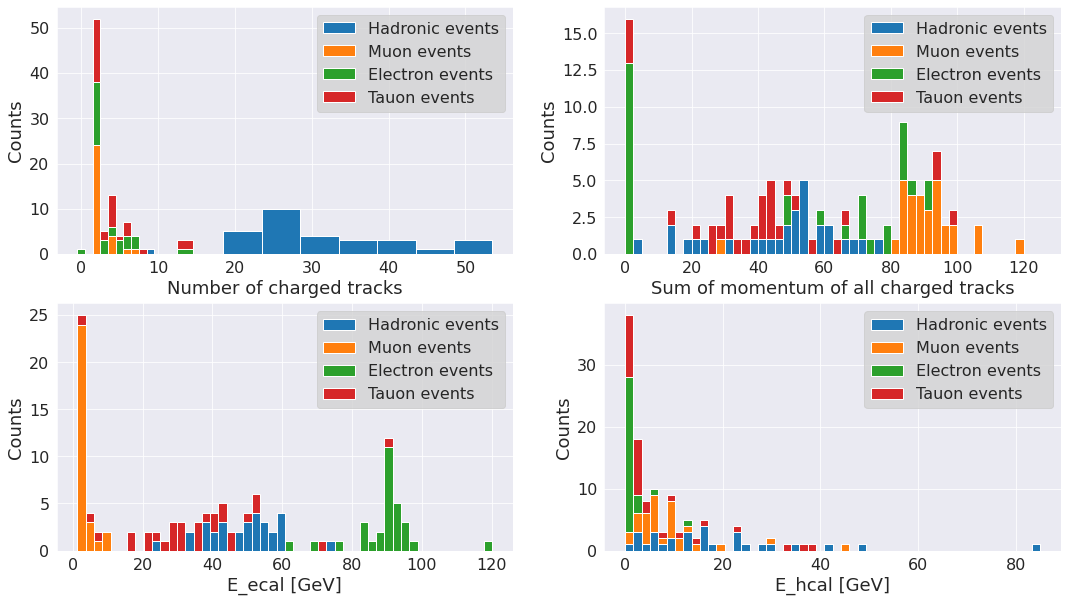

In [42]:
# histograms
font_size = 18
#Manually chosen bins (numbers define bin seperations)
bins_N_Ctrk = np.asarray([-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,12.5,14.5,16.5,18.5,23.5,28.5,33.5,38.5,43.5,48.5,53.5])

%matplotlib inline
sb.set_style("darkgrid")

fig,axs = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(18)

axs[0,0].set_xlabel("Number of charged tracks", fontsize=font_size)
axs[0,0].set_ylabel("Counts", fontsize=font_size)
axs[0,0].hist((hadronic_events[:,2],muon_events[:,2],electron_events[:,2],tauon_events[:,2]), bins=bins_N_Ctrk, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
axs[0,0].tick_params(axis='x', labelsize=font_size-2)
axs[0,0].tick_params(axis='y', labelsize=font_size-2)
axs[0,0].legend(frameon=True, facecolor="lightgrey", fontsize=font_size-2)

axs[0,1].set_xlabel("Sum of momentum of all charged tracks", fontsize=font_size)
axs[0,1].set_ylabel("Counts", fontsize=font_size)
axs[0,1].hist((hadronic_events[:,3],muon_events[:,3],electron_events[:,3],tauon_events[:,3]), range=(0,125), bins=50, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
axs[0,1].tick_params(axis='x', labelsize=font_size-2)
axs[0,1].tick_params(axis='y', labelsize=font_size-2)
axs[0,1].legend(frameon=True, facecolor="lightgrey", fontsize=font_size-2)
# range parameter is used to exclude single data point at 293.1 so the rest of the distribution is better visible
# Use shorter x_Axis naming in final figure. Which unit?

axs[1,0].set_xlabel("E_ecal [GeV]", fontsize=font_size)
axs[1,0].set_ylabel("Counts", fontsize=font_size)
axs[1,0].hist((hadronic_events[:,4],muon_events[:,4],electron_events[:,4],tauon_events[:,4]), bins=50, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
axs[1,0].tick_params(axis='x', labelsize=font_size-2)
axs[1,0].tick_params(axis='y', labelsize=font_size-2)
axs[1,0].legend(frameon=True, facecolor="lightgrey", fontsize=font_size-2)

axs[1,1].set_xlabel("E_hcal [GeV]", fontsize=font_size)
axs[1,1].set_ylabel("Counts", fontsize=font_size)
axs[1,1].hist((hadronic_events[:,5],muon_events[:,5],electron_events[:,5],tauon_events[:,5]), bins=50, range=(0,85), label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
axs[1,1].tick_params(axis='x', labelsize=font_size-2)
axs[1,1].tick_params(axis='y', labelsize=font_size-2)
axs[1,1].legend(frameon=True, facecolor="lightgrey", fontsize=font_size-2)
# range is again to exclude a single point at around 200 GeV (more energy than we had initially) to focus the rest of the distribution - maybe exclude the point at little over 80 as well?

plt.savefig("histograms_grope_data.PDF")


In [0]:
# histogram (N_Muon)

#Manually chosen bins
bins_N_Muon = np.asarray([-0.5,0.5,1.5,2.5,3.5,])

%matplotlib inline
sb.set_style("darkgrid")

plt.hist((hadronic_events[:,6],muon_events[:,6],electron_events[:,6],tauon_events[:,6]), bins=bins_N_Muon, rwidth=0.6, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True) # rwidth parameter determines the bar width.

plt.xlabel("Number of detected muons", fontsize=14)
plt.ylabel("Counts", fontsize=14)

plt.legend(frameon=True, facecolor="lightgrey", fontsize=12)

In [0]:
# First ideas for cuts: 

# E_Cal: Highest energies - electrons, lowest energies - muons
# N_Ctrk. Highest Numbers - hadronic

# Next step... Maybe ratios of several measurands? E.g. P_Ctrk/N_Ctrk giving the average momentum of the charged track detected. Possibly muon events are better distinguishable using this ratio than directly P_Ctrk?

In [0]:
# Muon detection: low energy in E_cal (<15 GeV) and height P_Ctrk (>~80)
# electron detection: high energy in E_cal (> 75 GeV)
# Tauon detection : middle energy in E_cal (15-55 GeV)
# Hadron detection: middle energy in E_cal (20-75 GeV)

---

---

#3 Determining cuts and cut efficiencies with MC data
---
---

### A: Introducing and showing MC data

In [4]:
# Incorporate Monte-Carlo simulated data

path_data = 'opal_data/mc/'

mm_file = uproot.open(path_data+'mm.root')
qq_file = uproot.open(path_data+'qq.root')
ee_file = uproot.open(path_data+'ee.root')
tt_file = uproot.open(path_data+'tt.root')

ttree_name = 'myTTree'

mm_file[ttree_name].keys()

branches_mm = mm_file[ttree_name].arrays()
branches_qq = qq_file[ttree_name].arrays()
branches_ee = ee_file[ttree_name].arrays()
branches_tt = tt_file[ttree_name].arrays()

var_run = 'run'
var_event = 'event'
var_N_char = 'Ncharged'
var_P_char = 'Pcharged'
var_E_ecal = 'E_ecal'
var_E_hcal = 'E_hcal'
var_E_beam = 'E_lep'
var_cos_thru = 'cos_thru'
var_cos_thet = 'cos_thet'

# arrays sorted by properties: run, event, N_char, P_char, E_ecal, E_hcal, E_beam, cos_thru, cos_thet
qq=np.asarray([ak.to_numpy(branches_qq[var_run]),ak.to_numpy(branches_qq[var_event]),ak.to_numpy(branches_qq[var_N_char]),ak.to_numpy(branches_qq[var_P_char]),ak.to_numpy(branches_qq[var_E_ecal]),ak.to_numpy(branches_qq[var_E_hcal]),ak.to_numpy(branches_qq[var_E_beam]),ak.to_numpy(branches_qq[var_cos_thru]),ak.to_numpy(branches_qq[var_cos_thet])])
mm=np.asarray([ak.to_numpy(branches_mm[var_run]),ak.to_numpy(branches_mm[var_event]),ak.to_numpy(branches_mm[var_N_char]),ak.to_numpy(branches_mm[var_P_char]),ak.to_numpy(branches_mm[var_E_ecal]),ak.to_numpy(branches_mm[var_E_hcal]),ak.to_numpy(branches_mm[var_E_beam]),ak.to_numpy(branches_mm[var_cos_thru]),ak.to_numpy(branches_mm[var_cos_thet])])
ee=np.asarray([ak.to_numpy(branches_ee[var_run]),ak.to_numpy(branches_ee[var_event]),ak.to_numpy(branches_ee[var_N_char]),ak.to_numpy(branches_ee[var_P_char]),ak.to_numpy(branches_ee[var_E_ecal]),ak.to_numpy(branches_ee[var_E_hcal]),ak.to_numpy(branches_ee[var_E_beam]),ak.to_numpy(branches_ee[var_cos_thru]),ak.to_numpy(branches_ee[var_cos_thet])])
tt=np.asarray([ak.to_numpy(branches_tt[var_run]),ak.to_numpy(branches_tt[var_event]),ak.to_numpy(branches_tt[var_N_char]),ak.to_numpy(branches_tt[var_P_char]),ak.to_numpy(branches_tt[var_E_ecal]),ak.to_numpy(branches_tt[var_E_hcal]),ak.to_numpy(branches_tt[var_E_beam]),ak.to_numpy(branches_tt[var_cos_thru]),ak.to_numpy(branches_tt[var_cos_thet])])

[999. 999. 999. ... 999. 999. 999.]


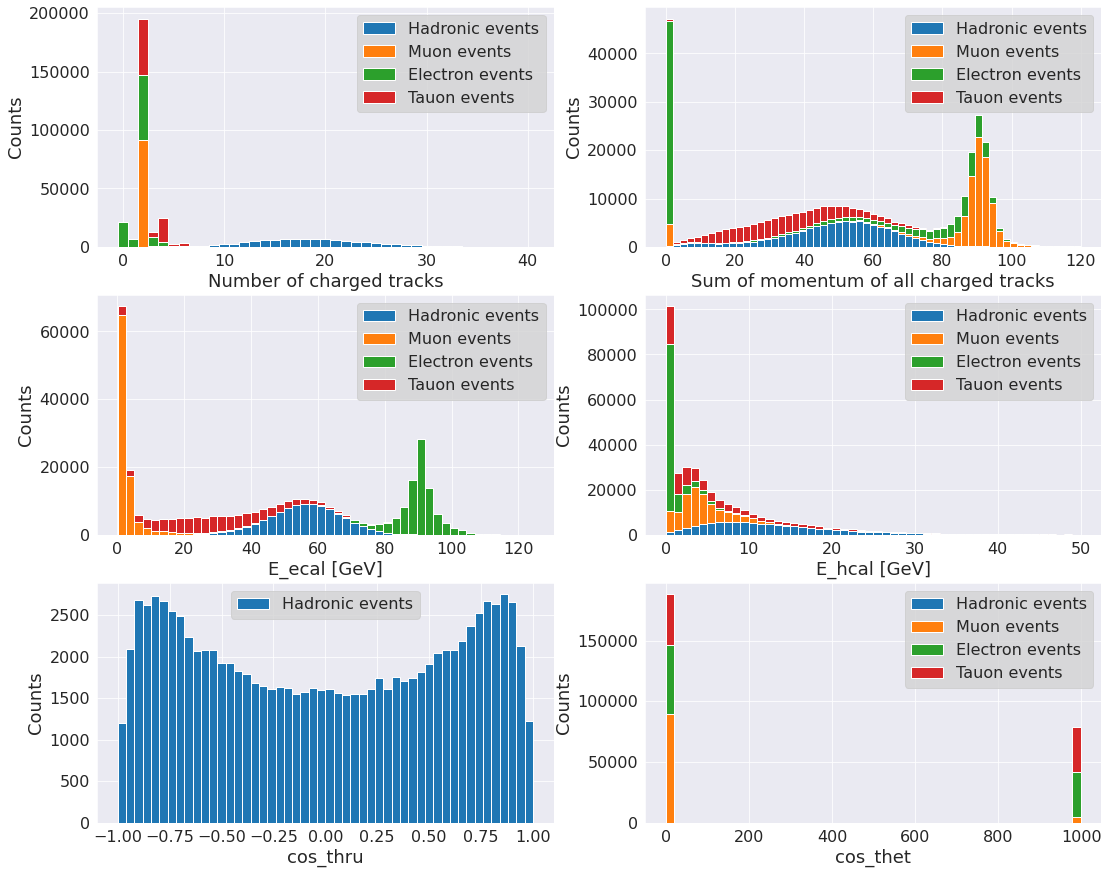

In [83]:
%matplotlib inline
sb.set_style("darkgrid")

font_size = 18
#Manually chosen bins 
bins_N_Ctrk_mc = np.linspace(-0.5,40.5,42)
bin_P_char = np.linspace(0,120,60)

fig,axs = plt.subplots(3,2)
fig.set_figheight(15)
fig.set_figwidth(18)

axs[0,0].set_xlabel("Number of charged tracks", fontsize=font_size)
axs[0,0].set_ylabel("Counts", fontsize=font_size)
axs[0,0].hist((qq[2,:],mm[2,:],ee[2,:],tt[2,:]), bins=bins_N_Ctrk_mc, label=("Hadronic events","Muon events","Electron events","Tauon events",'masked hadronic'), stacked=True)
axs[0,0].tick_params(axis='x', labelsize=font_size-2)
axs[0,0].tick_params(axis='y', labelsize=font_size-2)
axs[0,0].legend(frameon=True, facecolor="lightgrey", fontsize=font_size-2)

axs[0,1].set_xlabel("Sum of momentum of all charged tracks", fontsize=font_size)
axs[0,1].set_ylabel("Counts", fontsize=font_size)
axs[0,1].hist((qq[3,:],mm[3,:],ee[3,:],tt[3,:]), bins=bin_P_char, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
axs[0,1].tick_params(axis='x', labelsize=font_size-2)
axs[0,1].tick_params(axis='y', labelsize=font_size-2)
axs[0,1].legend(frameon=True, facecolor="lightgrey", fontsize=font_size-2)
# Use shorter x_Axis naming in final figure. Which unit?

axs[1,0].set_xlabel("E_ecal [GeV]", fontsize=font_size)
axs[1,0].set_ylabel("Counts", fontsize=font_size)
axs[1,0].hist((qq[4,:],mm[4,:],ee[4,:],tt[4,:]), bins=50, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
axs[1,0].tick_params(axis='x', labelsize=font_size-2)
axs[1,0].tick_params(axis='y', labelsize=font_size-2)
axs[1,0].legend(frameon=True, facecolor="lightgrey", fontsize=font_size-2)

axs[1,1].set_xlabel("E_hcal [GeV]", fontsize=font_size)
axs[1,1].set_ylabel("Counts", fontsize=font_size)
axs[1,1].hist((qq[5,:],mm[5,:],ee[5,:],tt[5,:]), bins=50, range=(0,50), label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
axs[1,1].tick_params(axis='x', labelsize=font_size-2)
axs[1,1].tick_params(axis='y', labelsize=font_size-2)
axs[1,1].legend(frameon=True, facecolor="lightgrey", fontsize=font_size-2)
# I am pretty sure that we need cos thru only for the hadrons and cos thet only for the leptons, I changed it to that way for the hadrons, the leptons are yet unchanged
# exclude or include correct labels, if we go forward with it
axs[2,0].set_xlabel("cos_thru", fontsize=font_size)
axs[2,0].set_ylabel("Counts", fontsize=font_size)
axs[2,0].hist(qq[7,:], bins=50, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True) #,mm[7,:],ee[7,:],tt[7,:])
axs[2,0].tick_params(axis='x', labelsize=font_size-2)
axs[2,0].tick_params(axis='y', labelsize=font_size-2)
axs[2,0].legend(frameon=True, facecolor="lightgrey", fontsize=font_size-2)

cos_thet_ee = ee[8,:]
cos_thet_mm = mm[8,:]
cos_thet_tt = tt[8,:]
cos_thet_qq = np.zeros(1)
print(qq[8,:])

# how do we keep the colour scheme when we dont want to include the hadronic events? I created an array with zeros of lenght one for that now

axs[2,1].set_xlabel("cos_thet", fontsize=font_size)
axs[2,1].set_ylabel("Counts", fontsize=font_size)
axs[2,1].hist((cos_thet_qq,cos_thet_mm,cos_thet_ee,cos_thet_tt), bins=50, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True) # qq[8,:],mm[8,:],ee[8,:],tt[8,:]
axs[2,1].tick_params(axis='x', labelsize=font_size-2)
axs[2,1].tick_params(axis='y', labelsize=font_size-2)
axs[2,1].legend(frameon=True, facecolor="lightgrey", fontsize=font_size-2)

plt.savefig("Histograms_Monte_Carlo_data.PDF")
# I wouldn't plot only hadrons for cos_thru and only leptons for cos_thet. I suggest we show all data here and concentrate on electron events in the next section

### B: Cuts for all four event types

##### Hadronic events

The percentage of hadron events surviving the cut 0.9947241865608798 , the share of electron  0.00026651883755143813  muon  0.0  tauon  0.01232105435907794  and hadron  0.9947241865608798  events on the total of the cut survivors with the cut 'mask_qq_N_Ctrk'


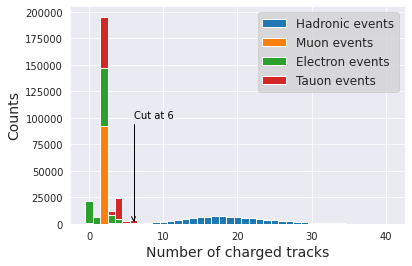

In [7]:
cut_h = 6  # Gives the value for the cut

mask_qq_N_Ctrk = branches_qq[var_N_char] > cut_h     # Cutting masks for all the four different events
mask_ee_N_Ctrk = branches_ee[var_N_char] > cut_h
mask_tt_N_Ctrk = branches_tt[var_N_char] > cut_h
mask_mm_N_Ctrk = branches_mm[var_N_char] > cut_h

efficiency_qq = np.sum(mask_qq_N_Ctrk)/len(mask_qq_N_Ctrk) # Gives the percentage of hadron events surviving the cut
precision_qe = np.sum(mask_ee_N_Ctrk)/ len(ee[1,:])
precision_qm = np.sum(mask_mm_N_Ctrk)/ len(mm[1,:])
precision_qt = np.sum(mask_tt_N_Ctrk)/ len(tt[1,:])
precision_qq = np.sum(mask_qq_N_Ctrk) / len(qq[1,:])  #Gives the percentage of hadron events out of all the cut survivors

qq_N = qq[2,:]
qq_N = qq_N[qq_N > cut_h]

#Manually chosen bins 
bins_N_Ctrk_mc = np.linspace(-0.5,40.5,42)

%matplotlib inline
sb.set_style("darkgrid")

plt.annotate("Cut at " + str(cut_h), xy=(cut_h, 0.2), xycoords='data',xytext=(cut_h, 100000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))

plt.hist((qq[2,:],mm[2,:],ee[2,:],tt[2,:]), bins=bins_N_Ctrk_mc, label=("Hadronic events","Muon events","Electron events","Tauon events",'masked hadronic'), stacked=True)

plt.xlabel("Number of charged tracks", fontsize=14)
plt.ylabel("Counts", fontsize=14)


plt.legend(frameon=True, facecolor="lightgrey", fontsize=12)

print("The percentage of hadron events surviving the cut", efficiency_qq,", the share of electron ",precision_qe," muon ",precision_qm," tauon ",precision_qt," and hadron ",precision_qq," events on the total of the cut survivors with the cut 'mask_qq_N_Ctrk'")

##### Electron events

The percentage of electron events surviving the cut 0.31245602439180403 , the share of electron  0.31245602439180403  muon  1.059535287822761e-05  tauon  0.002524806221122529  and hadron  0.0  events on the total of the cut survivors with the cut 'mask_ee_E_ecal'


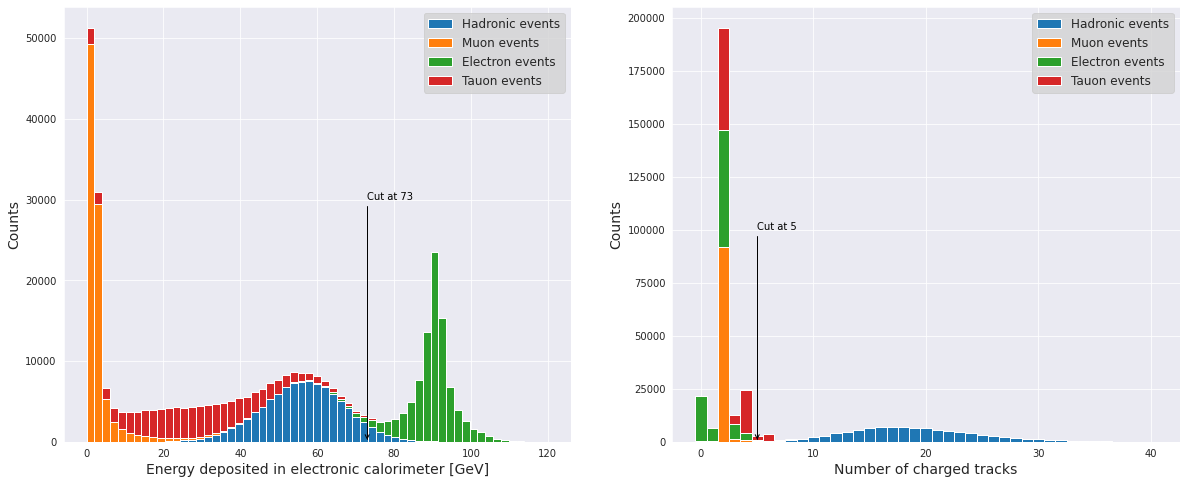

In [8]:
# cuts can probably be optimized still, have to add the cos theta cut
cut_E_ecal_e = 73
cut_N_Ctrk_e = 5
cut_cos_thet = 0.7

bins_N_Ctrk_mc = np.linspace(-0.5,40.5,42)
bin_P_char = np.linspace(0,120,60)
bin_ee = np.linspace(0,120,60)

mask_ee_E_ecal = branches_ee[var_E_ecal] >cut_E_ecal_e
mask_mm_E_ecal = branches_mm[var_E_ecal] >cut_E_ecal_e
mask_tt_E_ecal = branches_tt[var_E_ecal] >cut_E_ecal_e
mask_qq_E_ecal = branches_qq[var_E_ecal] >cut_E_ecal_e

mask_qq_N_Ctrk = branches_qq[var_N_char] < cut_N_Ctrk_e
mask_ee_N_Ctrk = branches_ee[var_N_char] < cut_N_Ctrk_e
mask_tt_N_Ctrk = branches_tt[var_N_char] < cut_N_Ctrk_e
mask_mm_N_Ctrk = branches_mm[var_N_char] < cut_N_Ctrk_e

mask_ee_cos_thet = branches_ee[var_cos_thet] < cut_cos_thet
mask_mm_cos_thet = branches_mm[var_cos_thet] < cut_cos_thet
mask_tt_cos_thet = branches_tt[var_cos_thet] < cut_cos_thet
mask_qq_cos_thet = branches_qq[var_cos_thet] < cut_cos_thet


output_ee = [a == p == n for a,p,n in zip(mask_ee_E_ecal,mask_ee_N_Ctrk,mask_ee_cos_thet) if a==True]   # Compares the two masks, check
output_qq = [a == p == n for a,p,n in zip(mask_qq_E_ecal,mask_qq_N_Ctrk,mask_qq_cos_thet) if a==True]
output_tt = [a == p == n for a,p,n in zip(mask_tt_E_ecal,mask_tt_N_Ctrk,mask_tt_cos_thet) if a==True]
output_mm = [a == p == n for a,p,n in zip(mask_mm_E_ecal,mask_mm_N_Ctrk,mask_mm_cos_thet) if a==True]

# output works as follows: the function in the brackets checks all values of mask_E_ecal and selects all that are True, that is the length of the array. It then checks whether the corresponding values in mask_N_Ctrk are True as well, if that is the case it saves a True, otherwise a False. The sum of hte output is therefore the number of events that passed both cuts. 

efficiency_ee = np.sum(output_ee)/len(ee[2,:]) # Gives the percentage of electron events surviving the cut
precision_ee = np.sum(output_ee)/len(ee[1,:])
precision_em = np.sum(output_mm)/len(mm[1,:])
precision_et = np.sum(output_tt)/len(tt[1,:])
precision_eq = np.sum(output_qq) /len(qq[1,:])

%matplotlib inline
sb.set_style("darkgrid")

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(20)

ax1.annotate("Cut at " + str(cut_E_ecal_e), xy=(cut_E_ecal_e, 0.2), xycoords='data',xytext=(cut_E_ecal_e, 30000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))
ax1.hist((qq[4,:],mm[4,:],ee[4,:],tt[4,:]), bins=bin_ee, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
#plt.hist(ee_E_cal, zorder=5 , bins = bin_ee,label='electronic events after the cut')
ax1.set_xlabel("Energy deposited in electronic calorimeter [GeV]", fontsize=14)
ax1.set_ylabel("Counts", fontsize=14)
ax1.legend(frameon=True, facecolor="lightgrey", fontsize=12)

ax2.annotate("Cut at " + str(cut_N_Ctrk_e), xy=(cut_N_Ctrk_e, 0.2), xycoords='data',xytext=(cut_N_Ctrk_e, 100000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))
ax2.hist((qq[2,:],mm[2,:],ee[2,:],tt[2,:]), bins=bins_N_Ctrk_mc, label=("Hadronic events","Muon events","Electron events","Tauon events",'masked hadronic'), stacked=True)

ax2.set_xlabel("Number of charged tracks", fontsize=14)
ax2.set_ylabel("Counts", fontsize=14)
ax2.legend(frameon=True, facecolor="lightgrey", fontsize=12)

print("The percentage of electron events surviving the cut", efficiency_ee,", the share of electron ",precision_ee," muon ",precision_em," tauon ",precision_et," and hadron ",precision_eq," events on the total of the cut survivors with the cut 'mask_ee_E_ecal'")

##### Muon events

In [0]:
# Ideas for cuts:
# Separation from hadrons via N_char, separation from electrons via E_ecal, separation from tauons via P_char
# Last one (distinction from tauons) is probably most difficult as 1. the P=0 events need to be included -> We need two cuts for the same parameter and 2. there still is a notable overlap between tauons and muons

The percentage of muon events surviving the cut 0.951166018584249 , the share of electron  0.0  muon  0.951166018584249  tauon  0.005276845002146085  and hadron  1.0145795075231071e-05  events on the total of the cut survivors with the cut 'mask_mm'


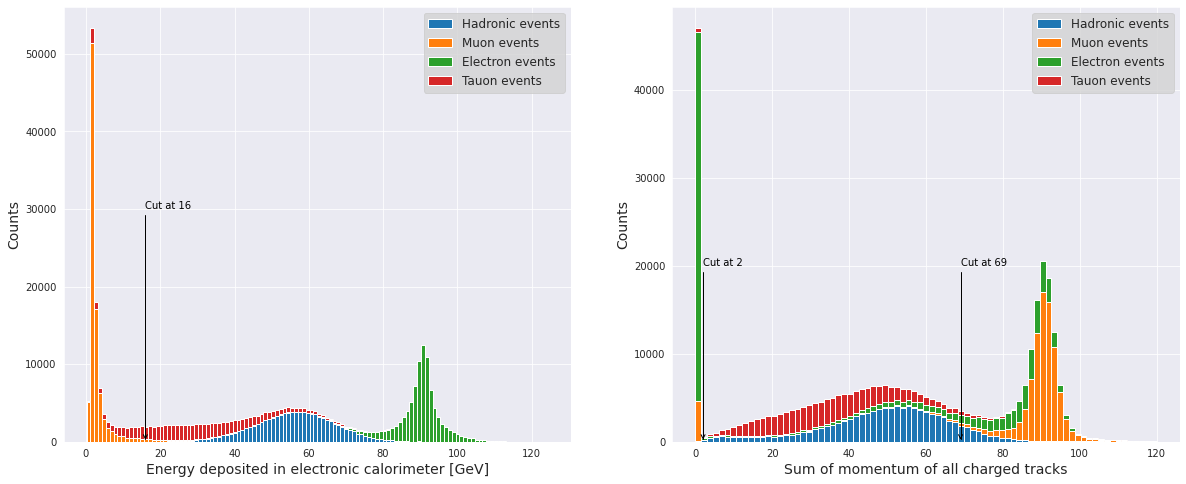

In [9]:
cut_P_char_high_m = 69
cut_P_char_low_m = 2
cut_E_ecal_m = 16

bins_N_Ctrk_mc = np.linspace(-0.5,40.5,42)
bin_P_char = np.linspace(0,120,60)
bin_P_char_2 = np.linspace(0,120,80)

mask_qq_P_char_high = branches_qq[var_P_char] > cut_P_char_high_m
mask_ee_P_char_high = branches_ee[var_P_char] > cut_P_char_high_m
mask_tt_P_char_high = branches_tt[var_P_char] > cut_P_char_high_m
mask_mm_P_char_high = branches_mm[var_P_char] > cut_P_char_high_m

mask_qq_E_ecal_high = branches_qq[var_E_ecal] < cut_E_ecal_m
mask_ee_E_ecal_high = branches_ee[var_E_ecal] < cut_E_ecal_m
mask_tt_E_ecal_high = branches_tt[var_E_ecal] < cut_E_ecal_m
mask_mm_E_ecal_high = branches_mm[var_E_ecal] < cut_E_ecal_m

mask_qq_P_char_low = branches_qq[var_P_char] < cut_P_char_low_m
mask_ee_P_char_low = branches_ee[var_P_char] < cut_P_char_low_m
mask_tt_P_char_low = branches_tt[var_P_char] < cut_P_char_low_m
mask_mm_P_char_low = branches_mm[var_P_char] < cut_P_char_low_m

mask_qq_E_ecal_low = branches_qq[var_E_ecal] < cut_E_ecal_m
mask_ee_E_ecal_low = branches_ee[var_E_ecal] < cut_E_ecal_m
mask_tt_E_ecal_low = branches_tt[var_E_ecal] < cut_E_ecal_m
mask_mm_E_ecal_low = branches_mm[var_E_ecal] < cut_E_ecal_m

output_ee_high = [a == p for a,p in zip(mask_ee_E_ecal_high,mask_ee_P_char_high) if a==True]   # Compares the two masks
output_qq_high = [a == p for a,p in zip(mask_qq_E_ecal_high,mask_qq_P_char_high) if a==True]
output_tt_high = [a == p for a,p in zip(mask_tt_E_ecal_high,mask_tt_P_char_high) if a==True]
output_mm_high = [a == p for a,p in zip(mask_mm_E_ecal_high,mask_mm_P_char_high) if a==True]

output_ee_low = [a == p for a,p in zip(mask_ee_E_ecal_low,mask_ee_P_char_low) if a==True]   # Compares the two masks
output_qq_low = [a == p for a,p in zip(mask_qq_E_ecal_low,mask_qq_P_char_low) if a==True]
output_tt_low = [a == p for a,p in zip(mask_tt_E_ecal_low,mask_tt_P_char_low) if a==True]
output_mm_low = [a == p for a,p in zip(mask_mm_E_ecal_low,mask_mm_P_char_low) if a==True]

output_mm = output_mm_high + output_mm_low
output_ee = output_ee_high + output_ee_low
output_tt = output_tt_high + output_tt_low
output_qq = output_qq_high + output_qq_low

efficiency_mm = np.sum(output_mm)/len(mm[2,:]) # Gives the percentage of muon events surviving the cut
precision_me = np.sum(output_ee)/len(ee[1,:])
precision_mm = np.sum(output_mm)/len(mm[1,:])
precision_mt = np.sum(output_tt)/len(tt[1,:])
precision_mq = np.sum(output_qq) / len(qq[1,:])

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(20)

ax1.annotate("Cut at " + str(cut_E_ecal_m), xy=(cut_E_ecal_m, 0.2), xycoords='data',xytext=(cut_E_ecal_m, 30000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))
ax1.hist((qq[4,:],mm[4,:],ee[4,:],tt[4,:]), bins=120, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
#plt.hist(ee_E_cal, zorder=5 , bins = bin_ee,label='electronic events after the cut')
ax1.set_xlabel("Energy deposited in electronic calorimeter [GeV]", fontsize=14)
ax1.set_ylabel("Counts", fontsize=14)
ax1.legend(frameon=True, facecolor="lightgrey", fontsize=12)

ax2.annotate("Cut at " + str(cut_P_char_high_m), xy=(cut_P_char_high_m, 0.2), xycoords='data',xytext=(cut_P_char_high_m, 20000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))
ax2.annotate("Cut at " + str(cut_P_char_low_m), xy=(cut_P_char_low_m, 0.2), xycoords='data',xytext=(cut_P_char_low_m, 20000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))
ax2.set_xlabel("Sum of momentum of all charged tracks", fontsize=14)
ax2.set_ylabel("Counts", fontsize=14)
ax2.hist((qq[3,:],mm[3,:],ee[3,:],tt[3,:]), bins=bin_P_char_2, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
ax2.legend(frameon=True, facecolor="lightgrey", fontsize=12)

print("The percentage of muon events surviving the cut", efficiency_mm,", the share of electron ",precision_me," muon ",precision_mm," tauon ",precision_mt," and hadron ",precision_mq," events on the total of the cut survivors with the cut 'mask_mm'")

##### Tauon events

In [10]:
# Warning: This cell takes quite long to execute

cut_P_char_low_t = 2

qq_P_char_greater_low = np.asarray([])
for i in range (0, int(len(qq[3])-1.)):
    if (qq[3,i]>cut_P_char_low_t):
        qq_P_char_greater_low = np.append(qq_P_char_greater_low, qq[3,i])
    else:
        qq_P_char_greater_low = np.append(qq_P_char_greater_low, 1000)
ee_P_char_greater_low = np.asarray([])
for i in range (0, int(len(ee[3])-1.)):
    if (ee[3,i]>cut_P_char_low_t):
        ee_P_char_greater_low = np.append(ee_P_char_greater_low, ee[3,i])
    else:
        ee_P_char_greater_low = np.append(ee_P_char_greater_low, 1000)
mm_P_char_greater_low = np.asarray([])
for i in range (0, int(len(mm[3])-1.)):
    if (mm[3,i]>cut_P_char_low_t):
        mm_P_char_greater_low = np.append(mm_P_char_greater_low, mm[3,i])
    else:
        mm_P_char_greater_low = np.append(mm_P_char_greater_low, 1000)
tt_P_char_greater_low = np.asarray([])
for i in range (0, int(len(tt[3])-1.)):
    if (tt[3,i]>cut_P_char_low_t):
        tt_P_char_greater_low = np.append(tt_P_char_greater_low, tt[3,i])
    else:
        tt_P_char_greater_low = np.append(tt_P_char_greater_low, 1000)
# Introduced to perform a cut from both edges: Events with P_char <= 'low' are converted to events with value 1000 in this variable, so the high cut discriminates those events as well, without changing the position of events in the array.
# If loops are slow, but working

In [11]:
# Warning: This cell takes quite long to execute
cut_E_ecal_low_t = 1

qq_E_ecal_greater_low = np.asarray([])
for i in range (0, int(len(qq[4])-1.)):
    if (qq[4,i]>cut_E_ecal_low_t):
        qq_E_ecal_greater_low = np.append(qq_E_ecal_greater_low, qq[4,i])
    else:
        qq_E_ecal_greater_low = np.append(qq_E_ecal_greater_low, 1000)
ee_E_ecal_greater_low = np.asarray([])
for i in range (0, int(len(ee[4])-1.)):
    if (ee[4,i]>cut_E_ecal_low_t):
        ee_E_ecal_greater_low = np.append(ee_E_ecal_greater_low, ee[4,i])
    else:
        ee_E_ecal_greater_low = np.append(ee_E_ecal_greater_low, 1000)
mm_E_ecal_greater_low = np.asarray([])
for i in range (0, int(len(mm[4])-1.)):
    if (mm[4,i]>cut_E_ecal_low_t):
        mm_E_ecal_greater_low = np.append(mm_E_ecal_greater_low, mm[4,i])
    else:
        mm_E_ecal_greater_low = np.append(mm_E_ecal_greater_low, 1000)
tt_E_ecal_greater_low = np.asarray([])
for i in range (0, int(len(tt[4])-1.)):
    if (tt[4,i]>cut_E_ecal_low_t):
        tt_E_ecal_greater_low = np.append(tt_E_ecal_greater_low, tt[4,i])
    else:
        tt_E_ecal_greater_low = np.append(tt_E_ecal_greater_low, 1000)
# Introduced to perform a cut from both edges: Events with E_ecal <= 2 are converted to events with value 1000 in this variable, so the high cut discriminates those events as well, without changing the position of events in the array.
# If loops are slow, but working

The percentage of tauon events surviving the cut 0.9267553715252355 , the share of electron  0.003912496535255112  muon  0.021614519871584324  tauon  0.9267553715252355  and hadron  0.004291671316822743  events on the total of the cut survivors with the cut 'mask_tt'
73412


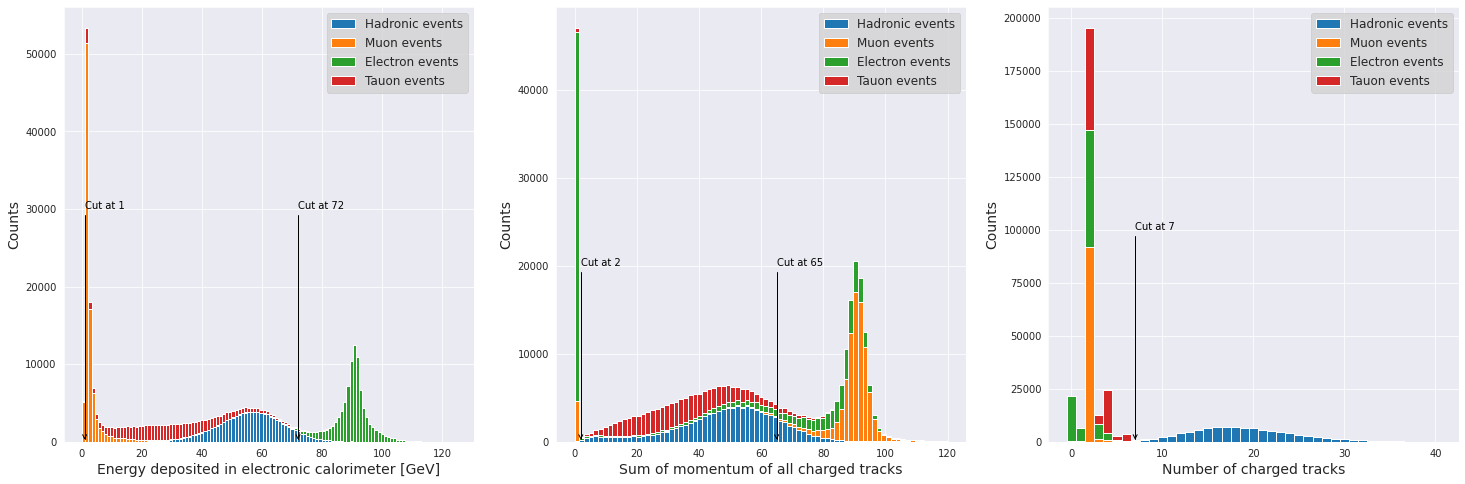

In [98]:
cut_P_char_high_t = 65
cut_E_ecal_high_t = 72
cut_N_Ctrk_t = 7

bins_N_Ctrk_mc = np.linspace(-0.5,40.5,42)
bin_P_char = np.linspace(0,120,60)
bin_P_char_2 = np.linspace(0,120,80)

mask_qq_N_Ctrk = branches_qq[var_N_char] < cut_N_Ctrk_t
mask_ee_N_Ctrk = branches_ee[var_N_char] < cut_N_Ctrk_t
mask_tt_N_Ctrk = branches_tt[var_N_char] < cut_N_Ctrk_t
mask_mm_N_Ctrk = branches_mm[var_N_char] < cut_N_Ctrk_t

mask_qq_P_char_high = qq_P_char_greater_low < cut_P_char_high_t
mask_ee_P_char_high = ee_P_char_greater_low < cut_P_char_high_t
mask_tt_P_char_high = tt_P_char_greater_low < cut_P_char_high_t
mask_mm_P_char_high = mm_P_char_greater_low < cut_P_char_high_t

mask_qq_E_ecal_high = qq_E_ecal_greater_low < cut_E_ecal_high_t
mask_ee_E_ecal_high = ee_E_ecal_greater_low < cut_E_ecal_high_t
mask_tt_E_ecal_high = tt_E_ecal_greater_low < cut_E_ecal_high_t
mask_mm_E_ecal_high = mm_E_ecal_greater_low < cut_E_ecal_high_t

output_ee = [a == p == n for a,p,n in zip(mask_ee_E_ecal_high,mask_ee_P_char_high,mask_ee_N_Ctrk) if a==True]   # Compares the two masks, check
output_qq = [a == p == n for a,p,n in zip(mask_qq_E_ecal_high,mask_qq_P_char_high,mask_qq_N_Ctrk) if a==True]
output_tt = [a == p == n for a,p,n in zip(mask_tt_E_ecal_high,mask_tt_P_char_high,mask_tt_N_Ctrk) if a==True]
output_mm = [a == p == n for a,p,n in zip(mask_mm_E_ecal_high,mask_mm_P_char_high,mask_mm_N_Ctrk) if a==True]

event_sum =  np.sum(output_mm) + np.sum(output_ee) + np.sum(output_tt) + np.sum(output_qq)
efficiency_tt = np.sum(output_tt)/len(tt[2,:]) # Gives the percentage of muon events surviving the cut
precision_te = np.sum(output_ee)/len(ee[1,:])
precision_tm = np.sum(output_mm)/len(mm[1,:])
precision_tt = np.sum(output_tt)/len(tt[1,:])
precision_tq = np.sum(output_qq) / len(qq[1,:])

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_figheight(8)
fig.set_figwidth(25)

ax1.annotate("Cut at " + str(cut_E_ecal_high_t), xy=(cut_E_ecal_high_t, 0.2), xycoords='data',xytext=(cut_E_ecal_high_t, 30000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))
ax1.annotate("Cut at " + str(cut_E_ecal_low_t), xy=(cut_E_ecal_low_t, 0.2), xycoords='data',xytext=(cut_E_ecal_low_t, 30000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))
ax1.hist((qq[4,:],mm[4,:],ee[4,:],tt[4,:]), bins=120, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
#plt.hist(ee_E_cal, zorder=5 , bins = bin_ee,label='electronic events after the cut')
ax1.set_xlabel("Energy deposited in electronic calorimeter [GeV]", fontsize=14)
ax1.set_ylabel("Counts", fontsize=14)
ax1.legend(frameon=True, facecolor="lightgrey", fontsize=12)

ax2.annotate("Cut at " + str(cut_P_char_high_t), xy=(cut_P_char_high_t, 0.2), xycoords='data',xytext=(cut_P_char_high_t, 20000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))
ax2.annotate("Cut at " + str(cut_P_char_low_t), xy=(cut_P_char_low_t, 0.2), xycoords='data',xytext=(cut_P_char_low_t, 20000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))
ax2.set_xlabel("Sum of momentum of all charged tracks", fontsize=14)
ax2.set_ylabel("Counts", fontsize=14)
ax2.hist((qq[3,:],mm[3,:],ee[3,:],tt[3,:]), bins=bin_P_char_2, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
ax2.legend(frameon=True, facecolor="lightgrey", fontsize=12)

ax3.annotate("Cut at " + str(cut_N_Ctrk_t), xy=(cut_N_Ctrk_t, 0.2), xycoords='data',xytext=(cut_N_Ctrk_t, 100000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))
ax3.hist((qq[2,:],mm[2,:],ee[2,:],tt[2,:]), bins=bins_N_Ctrk_mc, label=("Hadronic events","Muon events","Electron events","Tauon events",'masked hadronic'), stacked=True)

ax3.set_xlabel("Number of charged tracks", fontsize=14)
ax3.set_ylabel("Counts", fontsize=14)
ax3.legend(frameon=True, facecolor="lightgrey", fontsize=12)


print("The percentage of tauon events surviving the cut", efficiency_tt,", the share of electron ",precision_te," muon ",precision_tm," tauon ",precision_tt," and hadron ",precision_tq," events on the total of the cut survivors with the cut 'mask_tt'")

### C: Separating S- and T-channel for the electron events


Fit program full output:

Beta: [292.88508289  21.69511104]
Beta Std Error: [7.92628791 0.86208843]
Beta Covariance: [[ 3.85119591 -0.11905712]
 [-0.11905712  0.04555747]]
Residual Variance: 16.31338459261468
Inverse Condition #: 0.4703076357238784
Reason(s) for Halting:
  Sum of squares convergence

The coefficients are:  292.88508289293515  for the S-channel and  21.69511103637671  for the T-channel.



The number of total electron events is: 56720.0 +- 238.15961034566715 , the number of events due to the S-channel events is: 31202.578582763672 +- 844.4289307594299 (calculated as sum of all the values that our S-channel fit computes for each bin). Therefore, the share of S-channel events is 0.5501159834760873 +- 0.0023140859506700193

The total number of S-channel events is: 31202.578582763672 +- 844.4289307594299 , the number of S-channel events surviving the cut is: 25134.14427562744 +- 680.2001041921515 . Therefore, the fraction of S-channel events surviving the cut is 0.8055149739935776 +- 0.030829126542953025


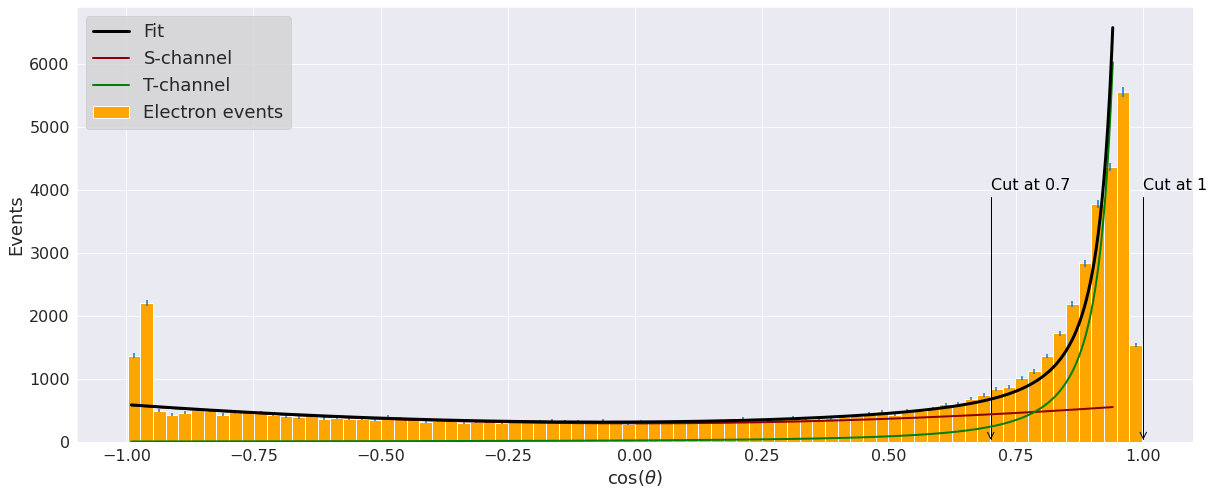

In [48]:
font_size = 18

bins_cos_thet = 80

cut_cos_theta = 0.7
mask_ee_cos = branches_ee[var_cos_thet] < 1

mask_ee_S_channel = branches_ee[var_cos_thet] < cut_cos_theta

bin_content_theta, bin_edges_theta, _ = plt.hist((ee[8,:][mask_ee_cos]),bins=bins_cos_thet,  histtype='step')

bin_edges_cut = np.asarray([])
for i in range (0, len(bin_edges_theta)):
    if (bin_edges_theta[i]<cut_cos_theta):
        bin_edges_cut = np.append(bin_edges_cut,bin_edges_theta[i])

bins_theta_fit= np.asarray([])
for i in range (2,int(len(bin_edges_theta)-3.)):
    bins_theta_fit=np.append(bins_theta_fit,bin_edges_theta[i]+(bin_edges_theta[2]-bin_edges_theta[1])/2)
bin_content_fit= np.asarray([])
for i in range (2,int(len(bin_content_theta)-2.)):
    bin_content_fit=np.append(bin_content_fit,bin_content_theta[i])
# The first and the last two bins are excluded for the fitting process, although resulting function might be shown in these regions of the histogram as well.

def s_t_channels(B, x):
    return B[0]*(1+x**2)+B[1]/(1-x)**2

mymodel = Model(s_t_channels)
mydata = RealData(bins_theta_fit, bin_content_fit, sx=10**(-99), sy=np.sqrt(bin_content_fit)) 
myodr = ODR(mydata, mymodel, beta0=[400, 20], job=2) 
output_s_t = myodr.run() 

print("")
print("Fit program full output:")
print("")
output_s_t.pprint() 
print("")
print("The coefficients are: ",output_s_t.beta[0]," for the S-channel and ",output_s_t.beta[1]," for the T-channel.")
print("")

many_bins=np.linspace(-0.99,0.94,1000)
mid_bins_theta=bin_edges_theta[1:]-(bin_edges_theta[2]-bin_edges_theta[1])/2
mid_bins_cut=bin_edges_cut[1:]-(bin_edges_cut[2]-bin_edges_cut[1])/2


%matplotlib inline
sb.set_style("darkgrid")

fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)


ax.annotate("Cut at " + str(cut_cos_theta), xy=(cut_cos_theta, 0.2), xycoords='data',xytext=(cut_cos_theta, 4000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)),size=font_size-2)
ax.annotate("Cut at 1", xy=(1, 0.2), xycoords='data',xytext=(1, 4000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)),size=font_size-2)
ax.plot(many_bins, s_t_channels(output_s_t.beta, many_bins), linewidth=3, color="black", zorder=5, label="Fit")
ax.plot(many_bins, s_t_channels([output_s_t.beta[0],0], many_bins), linewidth=2, color="darkred", zorder=4, label="S-channel")
ax.plot(many_bins, s_t_channels([0,output_s_t.beta[1]], many_bins), linewidth=2, color="green", zorder=4, label="T-channel")
ax.hist((ee[8,:][mask_ee_cos]), bins=bin_edges_theta, label=("Electron events"), color="orange", stacked=True)
ax.errorbar(mid_bins_theta, bin_content_theta, yerr=np.sqrt(bin_content_theta), fmt='none')
ax.set_xlabel("cos($\\theta$)", fontsize=font_size)
ax.set_ylabel("Events", fontsize=font_size)
ax.tick_params(axis='x', labelsize=font_size-2)
ax.tick_params(axis='y', labelsize=font_size-2)
ax.legend(frameon=True, facecolor="lightgrey", fontsize=font_size)

plt.savefig('s_t_separation.PDF')

S_share=sum(s_t_channels([output_s_t.beta[0],0], mid_bins_theta))/sum(bin_content_theta)

u_Output=np.asarray([7.92628791, 0.86208843]) # taken from the second line of the fit program output (unable to recall it as variable directly)

u_S_share=np.sqrt((u_Output[0]/sum(bin_content_theta))**2 + (sum(s_t_channels([output_s_t.beta[0],0], mid_bins_theta))* np.sqrt(sum(bin_content_theta))/ sum(bin_content_theta)**2)**2 )

S_surviving_cut=sum(s_t_channels([output_s_t.beta[0],0], mid_bins_cut))/sum(s_t_channels([output_s_t.beta[0],0], mid_bins_theta))
u_S_surviving_cut=np.sqrt((sum(s_t_channels([u_Output[0],0], mid_bins_cut))/sum(s_t_channels([output_s_t.beta[0],0], mid_bins_theta)))**2 + (sum(s_t_channels([output_s_t.beta[0],0], mid_bins_cut))*sum(s_t_channels([u_Output[0],0], mid_bins_theta))/sum(s_t_channels([output_s_t.beta[0],0], mid_bins_theta))**2)**2)

print("The number of total electron events is:", sum(bin_content_theta), "+-", np.sqrt(sum(bin_content_theta)), ", the number of events due to the S-channel events is:",  sum(s_t_channels([output_s_t.beta[0],0], mid_bins_theta)),"+-", sum(s_t_channels([u_Output[0],0], mid_bins_theta)),"(calculated as sum of all the values that our S-channel fit computes for each bin). Therefore, the share of S-channel events is", S_share, "+-", u_S_share)

print("")
print("The total number of S-channel events is:",  sum(s_t_channels([output_s_t.beta[0],0], mid_bins_theta)),"+-", sum(s_t_channels([u_Output[0],0], mid_bins_theta)), ", the number of S-channel events surviving the cut is:", sum(s_t_channels([output_s_t.beta[0],0], mid_bins_cut)),"+-", sum(s_t_channels([u_Output[0],0], mid_bins_cut)),". Therefore, the fraction of S-channel events surviving the cut is", S_surviving_cut, "+-", u_S_surviving_cut)

In [14]:
# Due to our cos_thet cut, we lose a certain amount of s channel electrons. With the fits of the s- and t-channel functions, we can calculate, how many s-channel electrons we cut off and apply a factor that takes them into account.

cut_cos_thet = 0.7

relation = (output_s_t.beta[0]*(1+mid_bins_theta**2))/(output_s_t.beta[1]*(1/(1-mid_bins_theta))**2 + output_s_t.beta[0]*(1+mid_bins_theta**2))
# The relation gives the share of the s-channel electrons out of all the electrons for the different bins.
all_s_channel_events = np.sum(bin_content_theta * relation) - relation[0]*bin_content_theta[0] - relation[1]*bin_content_theta[1] + 2*bin_content_theta[2]*relation[2]
# This variable gives all s-channel electron events over the whole array. Since the first two bins obviously contain a lot of t-channel events, they are cut out and replaced by the bin content of the third bin.
mask_cos_theta_1 = mid_bins_theta < cut_cos_thet
mask_cos_theta_2 = mid_bins_theta < 1
mask_cos_theta_3 = branches_ee[var_cos_thet]< 1.5

output = [a==p for a,p in zip(mask_cos_theta_1,mask_cos_theta_2) if p == True]
sum_1 = np.sum(mask_cos_theta_3)
fraction = len(ee[1,:])/sum_1  # This fraction gives the ratio of all electron events and the electron events with a cos_thet smaller than 1.5. We assume that the electron events with cos_thet= 999 have the same distribution of s- and t-channel electrons as the ones with cos_thet < 1.5 With this factor, we include the earlier ones in our later calculations

s_channel_selected = np.sum(bin_content_theta[output]*relation[output]) - relation[0]*bin_content_theta[0] - relation[1]*bin_content_theta[1] + 2*bin_content_theta[2]*relation[2] # This gives the number of s-channel events selected by the cut, once again the anomalies of the first two bins are adjusted.

multiplication_factor = fraction * all_s_channel_events/s_channel_selected  # This multiplication factor gives the factor by which the detected electrons, which are mostly s-channel havet to be multiplied to account for all s-channel electrons.

print('The multiplication factor used to take all s-channel electrons into account is',multiplication_factor)

The multiplication factor used to take all s-channel electrons into account is 2.0630273955855305


In [15]:
mask_ee_S_channel = branches_ee[var_cos_thet] < cut_cos_theta
mask_ee_cos = branches_ee[var_cos_thet] < 1

mask_ee_E_ecal = branches_ee[var_E_ecal] >cut_E_ecal_e
mask_ee_N_Ctrk = branches_ee[var_N_char] < cut_N_Ctrk_e
output_ee = [a == p for a,p in zip(mask_ee_E_ecal,mask_ee_N_Ctrk) if a==True]
output_ee_and_smaller1 = [a == p == n for a,p,n in zip(mask_ee_E_ecal,mask_ee_N_Ctrk,mask_ee_cos) if a==True]
output_ee_and_cut = [a == p == n for a,p,n in zip(mask_ee_E_ecal,mask_ee_N_Ctrk,mask_ee_S_channel) if a==True]

print("Electronic events:", len(ee[8,:]))
print("Electronic events with cos($\\theta$)<1:", np.sum(mask_ee_cos))
print("Electronic events surviving the cos_cut:", np.sum(mask_ee_S_channel))
print("Electronic events surviving the electronic event cut:", np.sum(output_ee))
print("Electronic events with cos($\\theta$)<1 surviving the electronic event cut:", np.sum(output_ee_and_smaller1))
print("Electronic events surviving the cos_cut as well as the electronic event cut:", np.sum(output_ee_and_cut))
print("")
print("Efficiency to recognise electronic events (general):", np.sum(output_ee)/len(ee[8,:]))
print("Efficiency to recognise electronic events (t and s channel with cos($\\theta$)<1):", np.sum(output_ee_and_smaller1)/np.sum(mask_ee_cos))
print("Efficiency to recognise electronic events (only s channel):", np.sum(output_ee_and_cut)/np.sum(mask_ee_S_channel))

# Applying the cut to separate S and T channel did indeed increase our efficiency of recognising electronic events with the cuts determined earlier. However, attributing this increase to the discrimination of the T channel would be wrong. An additional cut was made at cos($\\theta) to exclude the evetns which stated 999 for this measurement. Comparing the efficiencies using this cut and the cut close to the intersection of T- and S-channel in the distribution results in two very similar values. Thus, the increase in efficiency is probably primarily caused by the exclusion of the cos($\\theta)=999 events, not the T-channel events. Therefore we assume, that the efficiency of recognising S- and T-channel electronic events is 

Electronic events: 93802
Electronic events with cos($\theta$)<1: 56720
Electronic events surviving the cos_cut: 29604
Electronic events surviving the electronic event cut: 90733
Electronic events with cos($\theta$)<1 surviving the electronic event cut: 55531
Electronic events surviving the cos_cut as well as the electronic event cut: 29309

Efficiency to recognise electronic events (general): 0.9672821475021854
Efficiency to recognise electronic events (t and s channel with cos($\theta$)<1): 0.9790373765867418
Efficiency to recognise electronic events (only s channel): 0.9900351303877855


### D: Efficiency matrix and inversion

In [16]:
# Calculation of the efficiency matrix
matrix_eff = np.array([[precision_ee,precision_em,precision_et,precision_eq],[precision_me,precision_mm,precision_mt,precision_mq],[precision_te,precision_tm,precision_tt,precision_tq],[precision_qe,precision_qm,precision_qt,precision_qq]])
# The earlier defined efficiencies are collected in one array

def error_matrix_eff_element(N_tot,N_sel):
    error_N_tot = (N_sel/(N_tot**1.5))**2
    error_N_sel = (np.sqrt(N_sel)/(N_tot))**2
    error = np.sqrt(error_N_tot + error_N_sel)
    return error

length = np.array([len(ee[1,:]),len(mm[1,:]),len(tt[1,:]),len(qq[1,:])])

err_matrix_eff = np.zeros([4,4])


for i in range(4):   # Calculates the error of the respective efficiency with the function introduced above
    for j in range(4):
        err_matrix_eff[i,j] = error_matrix_eff_element(length[i],matrix_eff[i,j]*length[j])

print('The efficiency matrix is',matrix_eff)
print('The error of the efficiency matrix is',err_matrix_eff)

The efficiency matrix is [[3.12456024e-01 1.05953529e-05 2.52480622e-03 0.00000000e+00]
 [0.00000000e+00 9.51166019e-01 5.27684500e-03 1.01457951e-05]
 [3.91249654e-03 2.16145199e-02 9.26755372e-01 4.29167132e-03]
 [2.66518838e-04 0.00000000e+00 1.23210544e-02 9.94724187e-01]]
The error of the efficiency matrix is [[2.09088806e-03 1.06608103e-05 1.50926464e-04 0.00000000e+00]
 [0.00000000e+00 4.43438083e-03 2.17101666e-04 1.05954090e-05]
 [2.42401226e-04 5.77476802e-04 4.74782686e-03 2.60330297e-04]
 [5.07354085e-05 0.00000000e+00 3.18530244e-04 4.48679068e-03]]


Errors for the inverse matrix:
[[2.14779624e-02 3.79369620e-05 5.27722136e-04 3.27807111e-06]
 [5.62738966e-06 4.85348450e-03 2.44418578e-04 1.15933545e-05]
 [8.58006721e-04 6.76868529e-04 5.42560280e-03 2.82735986e-04]
 [1.63414974e-04 1.16983516e-05 3.56704372e-04 4.53389921e-03]]
[[ 3.20061895e+00  1.62726975e-04 -8.72167989e-03  3.75648834e-05]
 [ 7.48101101e-05  1.05145173e+00 -5.99007193e-03  1.49542112e-05]
 [-1.34996109e-02 -2.45183996e-02  1.07928502e+00 -4.66063966e-03]
 [-6.92244629e-04  3.03536663e-04 -1.33643682e-02  1.00527735e+00]]


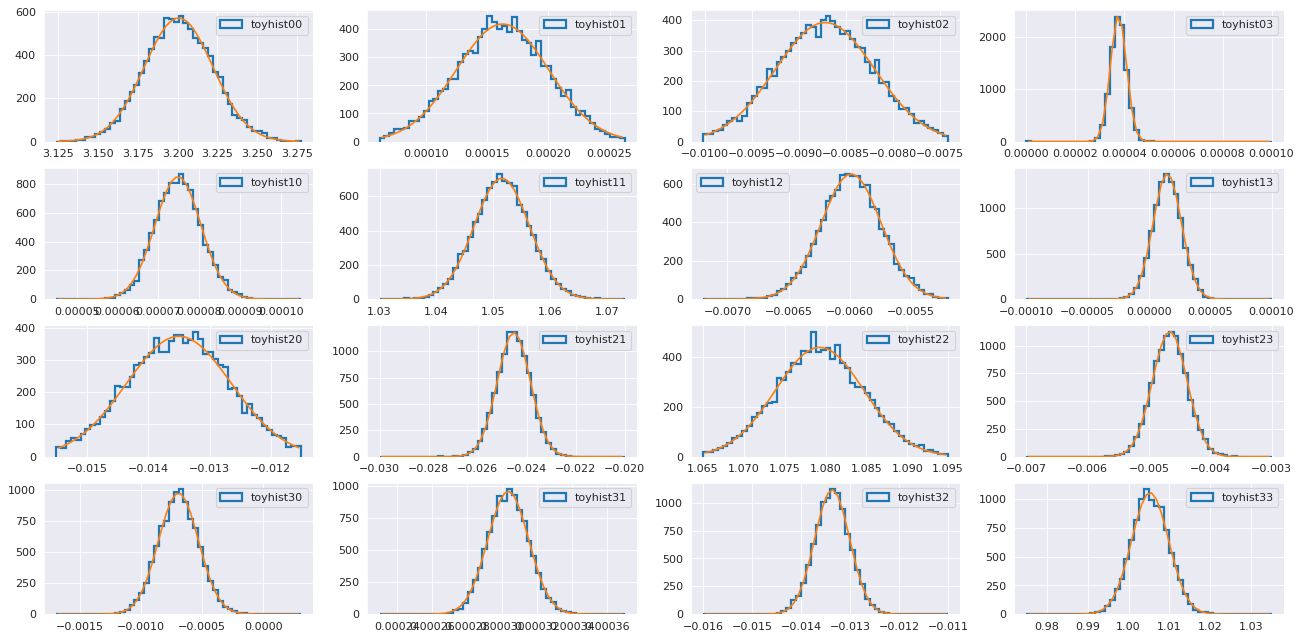

In [17]:
# number of toy experiments done
ntoy = 10000

### Create numpy matrix of list to append elements of inverted toy matrices
inverse_toys = np.empty((4,4))

# Create toy efficiency matrix out of gaussian-distributed random values
for i in range(0,ntoy,1):
    toy_matrix = np.zeros((4,4))
    toy_matrix = np.random.normal(matrix_eff,err_matrix_eff,size=(4,4))
    
    ### Invert toy matrix
    inverse_toy = np.linalg.inv(toy_matrix)
    
    #print(inverse_toys.item(0,0),inverse_toy.item(0,0))
    # Append values
    inverse_toys = np.dstack((inverse_toys,inverse_toy))
    
# Define gaussian function to fit to the toy distributions:
def gauss(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))


inverse_errors = np.zeros((4,4))
inverse_means = np.zeros((4,4))


fig = plt.figure(figsize=(20, 10),dpi=80)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
ax00 = plt.subplot(4,4,1)
ax01 = plt.subplot(4,4,2)
ax02 = plt.subplot(4,4,3)
ax03 = plt.subplot(4,4,4)

ax10 = plt.subplot(4,4,5)
ax11 = plt.subplot(4,4,6)
ax12 = plt.subplot(4,4,7)
ax13 = plt.subplot(4,4,8)

ax20 = plt.subplot(4,4,9)
ax21 = plt.subplot(4,4,10)
ax22 = plt.subplot(4,4,11)
ax23 = plt.subplot(4,4,12)

ax30 = plt.subplot(4,4,13)
ax31 = plt.subplot(4,4,14)
ax32 = plt.subplot(4,4,15)
ax33 = plt.subplot(4,4,16)

axes = [[ax00,ax01,ax02,ax03],
        [ax10,ax11,ax12,ax13],
        [ax20,ax21,ax22,ax23],
        [ax30,ax31,ax32,ax33]]

ranges = [[(np.mean(inverse_toys[0,0,:]) - 2*np.std(inverse_toys[0,0,:]) , (np.mean(inverse_toys[0,0,:]) + 2*np.std(inverse_toys[0,0,:]))),((np.mean(inverse_toys[0,1,:]))-0.0001,(np.mean(inverse_toys[0,1,:]))+0.0001), ((np.mean(inverse_toys[0,2,:])-0.0013),(np.mean(inverse_toys[0,2,:]))+0.0013), (-0.0000,0.0001)],
          [(np.mean(inverse_toys[1,0,:])-0.00003,np.mean(inverse_toys[1,0,:])+0.00003),(1.03,1.073)   , (-0.0072,-0.0052), (-0.0001,0.0001)],
          [(np.mean(inverse_toys[2,0,:])-0.002,np.mean(inverse_toys[2,0,:])+0.002),(-0.03,-0.02), (1.065,1.095)   , (-0.007,-0.003)],
          [(np.mean(inverse_toys[3,0,:])-0.001,np.mean(inverse_toys[3,0,:])+0.001),(0.00023,0.00037), (-0.016,-0.011), (0.975,1.035)]]

# Fill histograms for each inverted matrix coefficient:
for j in range(0,4,1):
    for k in range(0,4,1):
        
        # Diagonal and off-diagonal terms have different histogram ranges
        hbins, hedges, _ = axes[j][k].hist(inverse_toys[j,k,:],bins=50,range=ranges[j][k],  histtype='step', linewidth=2, label=f'toyhist{j}{k}')
        axes[j][k].legend()

        ## Guess initial parameters of the fit by taking random value from hist and std
        _p0 = [ntoy/10.,np.mean(inverse_toys[j,k,:]),np.std(inverse_toys[j,k,:])]

        # Get the fitted curve
        h_mid = 0.5*(hedges[1:] + hedges[:-1]) #Calculate midpoints for the fit
        coeffs, _ = curve_fit(gauss, h_mid, hbins, maxfev=10000, p0=_p0)
        h_fit = gauss(h_mid, *coeffs)
        
        axes[j][k].plot(h_mid, h_fit,label=f'Fit{j}{k}')

        inverse_means[j,k] = coeffs[1]
        inverse_errors[j,k] = abs(coeffs[2])

print(f"Errors for the inverse matrix:\n{inverse_errors}")
print(inverse_means)

---

---

#4 Actual data
---
---

### A: Introducing and showing the real data ("Daten_4")

In [18]:
path_actual_data = 'opal_data/data/'
# somehow, an os error occurs if I want to import the daten_4 file 
data_file = uproot.open(path_actual_data+'daten_4.root')

ttree_name = 'myTTree'

data_file[ttree_name].keys()

branches_data = data_file[ttree_name].arrays()

lumi, stat_err_lumi, err_lumi, total_err_lumi = np.loadtxt(path_actual_data+'lumi_files/daten_4.csv',delimiter=",", skiprows=1, usecols=(1,2,3,4), unpack = True)
# loading in the luminosity and the errors of the luminosity in different arrays
# arrays sorted by properties: run, event, N_char, P_char, E_ecal, E_hcal, E_beam, cos_thru, cos_thet
data=np.asarray([ak.to_numpy(branches_data[var_run]),ak.to_numpy(branches_data[var_event]),ak.to_numpy(branches_data[var_N_char]),ak.to_numpy(branches_data[var_P_char]),ak.to_numpy(branches_data[var_E_ecal]),ak.to_numpy(branches_data[var_E_hcal]),ak.to_numpy(branches_data[var_E_beam]),ak.to_numpy(branches_data[var_cos_thru]),ak.to_numpy(branches_data[var_cos_thet])])

In [0]:
# Plotting

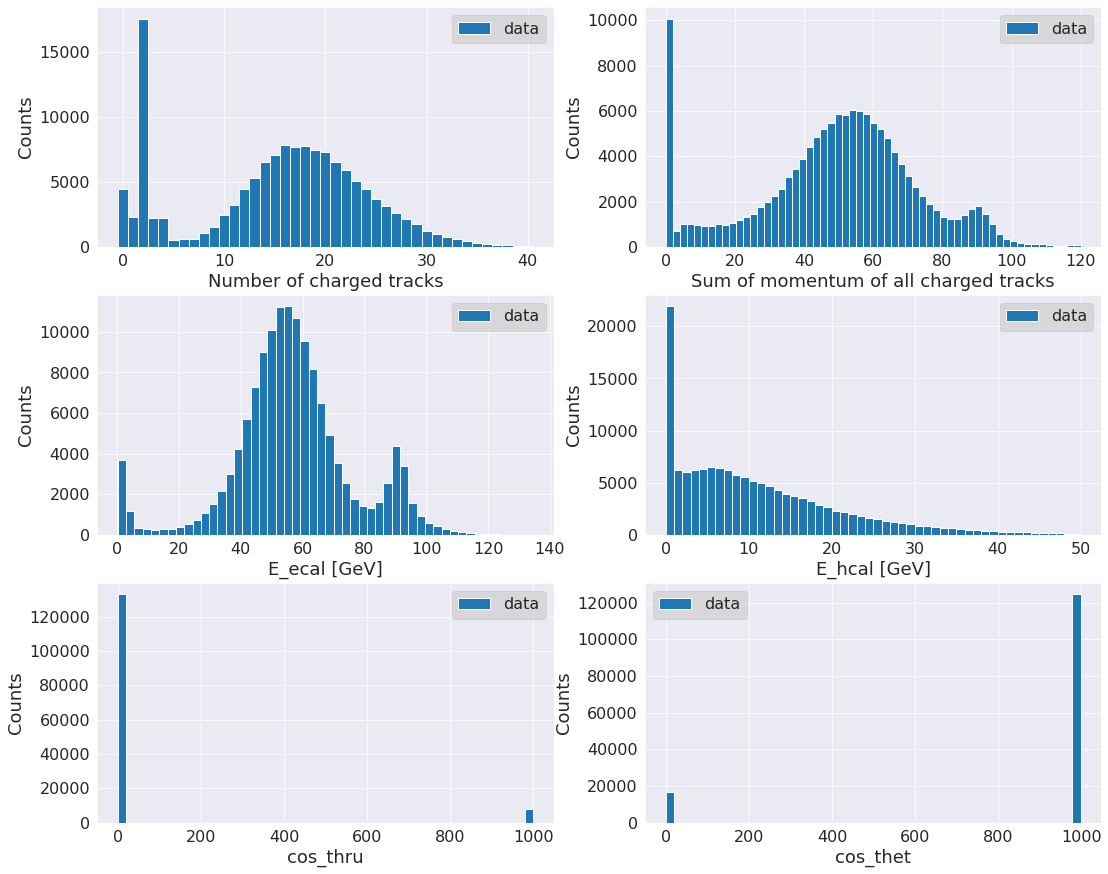

In [86]:
%matplotlib inline
sb.set_style("darkgrid")
label_hist = 'data'  # defines the label of the histograms, do we need a label?
font_size = 18

#Manually chosen bins for the histograms
bins_N_Ctrk_mc = np.linspace(-0.5,40.5,42)
bin_P_char = np.linspace(0,120,60)

fig,axs = plt.subplots(3,2) # maybe switch to 3x3 to show both angles as we read them in and without the '999' events
fig.set_figheight(15)
fig.set_figwidth(18)

axs[0,0].set_xlabel("Number of charged tracks", fontsize=font_size)
axs[0,0].set_ylabel("Counts", fontsize=font_size)
axs[0,0].hist(data[2,:], bins=bins_N_Ctrk_mc, label=(label_hist), stacked=True)
axs[0,0].tick_params(axis='x', labelsize=font_size-2)
axs[0,0].tick_params(axis='y', labelsize=font_size-2)
axs[0,0].legend(frameon=True, facecolor="lightgrey", fontsize=font_size-2)

axs[0,1].set_xlabel("Sum of momentum of all charged tracks", fontsize=font_size)
axs[0,1].set_ylabel("Counts", fontsize=font_size)
axs[0,1].hist(data[3,:], bins=bin_P_char, label=(label_hist), stacked=True)
axs[0,1].tick_params(axis='x', labelsize=font_size-2)
axs[0,1].tick_params(axis='y', labelsize=font_size-2)
axs[0,1].legend(frameon=True, facecolor="lightgrey", fontsize=font_size-2)
# Use shorter x_Axis naming in final figure. Which unit?

axs[1,0].set_xlabel("E_ecal [GeV]", fontsize=font_size)
axs[1,0].set_ylabel("Counts", fontsize=font_size)
axs[1,0].hist(data[4,:], bins=50, label=(label_hist), stacked=True)
axs[1,0].tick_params(axis='x', labelsize=font_size-2)
axs[1,0].tick_params(axis='y', labelsize=font_size-2)
axs[1,0].legend(frameon=True, facecolor="lightgrey", fontsize=font_size-2)

axs[1,1].set_xlabel("E_hcal [GeV]", fontsize=font_size)
axs[1,1].set_ylabel("Counts", fontsize=font_size)
axs[1,1].hist(data[5,:], bins=50, range=(0,50),label=(label_hist), stacked=True)
axs[1,1].tick_params(axis='x', labelsize=font_size-2)
axs[1,1].tick_params(axis='y', labelsize=font_size-2)
axs[1,1].legend(frameon=True, facecolor="lightgrey", fontsize=font_size-2)
# I am pretty sure that we need cos thru only for the hadrons and cos thet only for the leptons, I changed it to that way for the hadrons, the leptons are yet unchanged
# exclude or include correct labels, if we go forward with it
axs[2,0].set_xlabel("cos_thru", fontsize=font_size)
axs[2,0].set_ylabel("Counts", fontsize=font_size)
axs[2,0].hist(data[7,:], bins=50, label=(label_hist), stacked=True) #,mm[7,:],ee[7,:],tt[7,:])
axs[2,0].tick_params(axis='x', labelsize=font_size-2)
axs[2,0].tick_params(axis='y', labelsize=font_size-2)
axs[2,0].legend(frameon=True, facecolor="lightgrey", fontsize=font_size-2)

cos_thet_data = data[8,:]

axs[2,1].set_xlabel("cos_thet", fontsize=font_size)
axs[2,1].set_ylabel("Counts", fontsize=font_size)
axs[2,1].hist(cos_thet_data, bins=50, label=(label_hist), stacked=True)  # qq[8,:],mm[8,:],ee[8,:],tt[8,:]
axs[2,1].tick_params(axis='x', labelsize=font_size-2)
axs[2,1].tick_params(axis='y', labelsize=font_size-2)
axs[2,1].legend(frameon=True, facecolor="lightgrey", fontsize=font_size-2)

plt.savefig("histograms_opal_data.PDF")

# I wouldn't plot only hadrons for cos_thru and only leptons for cos_thet. I suggest we show all data here and concentrate on electron events in the next section

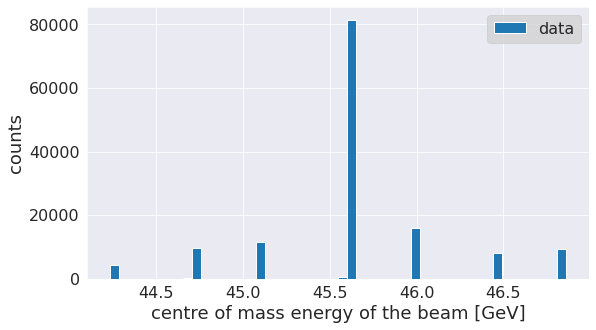

In [56]:
%matplotlib inline
sb.set_style("darkgrid")
label_hist = 'data'  # defines the label of the histograms, do we need a label?
font_size = 18

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(9)
ax.set_xlabel('centre of mass energy of the beam [GeV]', fontsize=font_size)
ax.set_ylabel('counts',fontsize=font_size)
ax.hist(data[6,:],bins= 50, label=label_hist)
ax.tick_params(axis='x', labelsize=font_size-2)
ax.tick_params(axis='y', labelsize=font_size-2)
ax.legend(frameon=True, facecolor='lightgrey', fontsize=font_size-2)

plt.savefig('histogram_com_opal_data.PDF')

### B: Applying the cuts

In [87]:
# Define the energy masks
# To split the data in the seven different energies, 7 masks were introduced that filter only events of one of the energies
energies = np.array([88.47,89.46,90.22,91.22,91.97,92.96,93.76])

mask_energy_44_2 = data[6,:] < 44.5

prelim_mask_1 = data[6,:] < 45                # These masks are just tools to define the actual energy masks
prelim_mask_2 = data[6,:] < 45.5              # They are defined so that the overlap region of two subsequent masks covers one distinct energy.
prelim_mask_3 = data[6,:] < 45.75
prelim_mask_4 = data[6,:] < 46.3
prelim_mask_5 = data[6,:] < 46.6

mask_energy_44_7 = np.zeros([len(data[1,:])])          # The empty energy masks are created, the naming corresponds to 44_7 = 44.7 GeV to avoid trouble with the dot.
mask_energy_45_1 = np.zeros([len(data[1,:])])
mask_energy_45_6 = np.zeros([len(data[1,:])])
mask_energy_45_9 = np.zeros([len(data[1,:])])
mask_energy_46_4 = np.zeros([len(data[1,:])])

for i in range(len(data[1,:])):          # In this for loop, the masks for the energies are defined
    mask_energy_44_7[i] = bool(prelim_mask_1[i] != mask_energy_44_2[i])
    mask_energy_45_1[i] = bool(prelim_mask_2[i] != prelim_mask_1[i])
    mask_energy_45_6[i] = bool(prelim_mask_3[i] != prelim_mask_2[i])
    mask_energy_45_9[i] = bool(prelim_mask_4[i] != prelim_mask_3[i])
    mask_energy_46_4[i] = bool(prelim_mask_5[i] != prelim_mask_4[i])

# The for loop works by checking for every index if their is a different entry in the two preliminary masks that are compared. If the entries are different, it returns True, if not false. From the definition, the overlap region of the preliminary masks return false entries and only for the certain energy that should be filtered out, the entries are True. The for loop ensures that the length of the energy masks is as long as the data array, so for every event, every energy mask has a True or False depending on the energy of the event.

mask_energy_46_8 = data[6,:] > 46.7

mask_energy = np.array([mask_energy_44_2, mask_energy_44_7, mask_energy_45_1, mask_energy_45_6, mask_energy_45_9,mask_energy_46_4, mask_energy_46_8])
# The masks are stored in one array, that makes it easier to work with them lateron

output_data = [a == p for a,p in zip(mask_energy[1,:],mask_energy[3,:]) if a==True]  #  to test for overlap

print(np.sum(mask_energy_44_2)+ np.sum(mask_energy_44_7)+ np.sum(mask_energy_45_1) +np.sum(mask_energy_45_6) + np.sum(mask_energy_45_9) + np.sum(mask_energy_46_4)+ np.sum(mask_energy_46_8))  # This sum checks, if we have the exact same number of True entries in all masks together as there are events
print(len(mask_energy_44_2),len(data[1,:]))   #check, that the mask has the correct length
print(np.sum(output_data))   # sum from overlap check

141144.0
141144 141144
0


#### Hadrons

In [21]:
N_data = np.zeros([4,7])  # this is the N array for our fits later on, with 4 rows for the different decay channels and 7 columns for the different energies

cut = 6  # Gives the value for the cut of the hadrons, this and the following cuts are made with the same values as the monte carlo cuts

mask_data_N_Ctrk = branches_data[var_N_char] > cut

N_qq = np.sum(mask_data_N_Ctrk)  # This gives the number of hadron events selected with the cut with no regards to the energy

for i in range(7):   # This for loop sorts the selected events according to their energy and stores it in the N_data array
    output_data_qq = [a == p for a,p in zip(mask_energy[i,:],mask_data_N_Ctrk) if a==True]
    N_data[3,i] = np.sum(output_data_qq)

print('The number of cut out events is', N_qq,'and the percentage of the total events is', N_qq/len(data[1,:]))
print(N_data)   # After every event cut, the N_data array is printed as a review to check if everything goes as planned

The number of cut out events is 111134 and the percentage of the total events is 0.787380264127416
[[    0.     0.     0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.     0.     0.]
 [ 2501.  6653.  8776. 66937. 13010.  6264.  6993.]]


#### Electrons

In [88]:
# electrons
cut_E_ecal = 73         # Defines the cut values
cut_N_Ctrk = 5
cut_cos_thet = 0.7

bins_N_Ctrk_mc = np.linspace(-0.5,40.5,42)
bin_P_char = np.linspace(0,120,60)
bin_ee = np.linspace(0,120,60)

mask_data_E_ecal = branches_data[var_E_ecal] > cut_E_ecal
mask_data_N_Ctrk = branches_data[var_N_char] < cut_N_Ctrk
mask_data_cos_thet = branches_data[var_cos_thet] < cut_cos_thet

output_data_ee = [a == p == n for a,p,n in zip(mask_data_E_ecal,mask_data_N_Ctrk,mask_data_cos_thet) if a == True]
N_ee = np.sum(output_data_ee) * 0.55 # multiplication_factor    # Due to the unique way of cutting and correcting, the number is no integer

for i in range(7):  # For a description of the for loop look in cell 47
    output_data_ee =[a == p == n == f for a,p,n,f in zip(mask_data_E_ecal,mask_data_N_Ctrk,mask_energy[i,:],mask_data_cos_thet) if n==True]
    N_data[0,i] = np.sum(output_data_ee) * 0.55 # multiplication_factor

print('The number of cut out events is', N_ee,'and the percentage of the total events is', N_ee/len(data[1,:]))
print(N_data)

The number of cut out events is 2499.75 and the percentage of the total events is 0.017710635946267643
[[  115.5    239.8    224.95  1388.75   263.45   114.95   152.35]
 [   96.     286.     403.    3000.     583.     281.     304.  ]
 [  396.     635.     731.    7064.     503.     487.     739.  ]
 [ 2501.    6653.    8776.   66937.   13010.    6264.    6993.  ]]


#### Muons

In [100]:
# warning, takes a fair amount of time
cut_P_char_high = 69
cut_P_char_low = 2
cut_E_ecal = 16
cut_N_Ctrk = 5

bins_N_Ctrk_mc = np.linspace(-0.5,40.5,42)
bin_P_char = np.linspace(0,120,60)
bin_P_char_2 = np.linspace(0,120,80)

mask_data_P_char_high = branches_data[var_P_char] > cut_P_char_high

mask_data_P_char_low = branches_data[var_P_char] < cut_P_char_low

mask_data_E_ecal = branches_data[var_E_ecal] < cut_E_ecal

output_data_high = [a == p for a,p in zip(mask_data_E_ecal,mask_data_P_char_high) if a==True]   # Compares the two masks
output_data_low = [a == p for a,p in zip(mask_data_E_ecal,mask_data_P_char_low) if a==True]   # Compares the two masks

N_mm = np.sum(output_data_high) + np.sum(output_data_low)

for i in range(7):  # Since we cut for one variable in two places, we need the two masks and the two output variables
    output_data_mm_high =[a == p == n  for a,p,n in zip(mask_data_E_ecal,mask_data_P_char_high,mask_energy[i,:]) if n==True]
    output_data_mm_low =[a == p == n  for a,p,n in zip(mask_data_E_ecal,mask_data_P_char_low,mask_energy[i,:]) if n==True]
    N_data[1,i] = np.sum(output_data_mm_high) + np.sum(output_data_mm_low)

print('The number of cut out events is', N_mm,'and the percentage of the total events is', N_mm/len(data[1,:]))
print(N_data)
print(np.sum(N_data[1,:]))

The number of cut out events is 4953 and the percentage of the total events is 0.035091821118857336
[[  115.5    239.8    224.95  1388.75   263.45   114.95   152.35]
 [   96.     286.     403.    3000.     583.     281.     304.  ]
 [  396.     635.     731.    7064.     503.     487.     739.  ]
 [ 2501.    6653.    8776.   66937.   13010.    6264.    6993.  ]]
4726


#### Tauons

In [24]:
# Warning: This cell takes quite long to execute

cut_P_char_low = 2

data_P_char_greater_low = np.asarray([])
for i in range (0, int(len(qq[3])-1.)):
    if (data[3,i]>cut_P_char_low):
        data_P_char_greater_low = np.append(data_P_char_greater_low, qq[3,i])
    else:
        data_P_char_greater_low = np.append(data_P_char_greater_low, 1000)

cut_E_ecal_low = 1

data_E_ecal_greater_low = np.asarray([])
for i in range (0, int(len(qq[4])-1.)):
    if (data[4,i] >cut_E_ecal_low):
        data_E_ecal_greater_low = np.append(data_E_ecal_greater_low, qq[4,i])
    else:
        data_E_ecal_greater_low = np.append(data_E_ecal_greater_low, 1000)

cut_P_char_high = 65
cut_E_ecal_high = 72
cut_N_Ctrk = 7

bins_N_Ctrk_mc = np.linspace(-0.5,40.5,42)
bin_P_char = np.linspace(0,120,60)
bin_P_char_2 = np.linspace(0,120,80)

mask_data_N_Ctrk = branches_data[var_N_char] < cut_N_Ctrk

mask_data_P_char_high = data_P_char_greater_low < cut_P_char_high

mask_data_E_ecal_high = data_E_ecal_greater_low < cut_E_ecal_high

output_data_tt = [a == p == n for a,p,n in zip(mask_data_E_ecal_high,mask_data_P_char_high,mask_data_N_Ctrk) if a==True]   # Compares the two masks, check

N_tt = np.sum(output_data_tt)


for i in range(7):
    output_data_tt =[a == p == n == d for a,p,n,d in zip(mask_data_E_ecal_high,mask_data_P_char_high,mask_energy[i,:],mask_data_N_Ctrk) if n==True]
    N_data[2,i] = np.sum(output_data_tt)

print('The number of cut out events is', N_tt,'and the percentage of the total events is', N_tt/len(data[1,:]))
print(N_data)
print(np.sum(N_data[3,:]))

The number of cut out events is 10555 and the percentage of the total events is 0.07478178314345633
[[  433.23575307   899.47994448   843.77820479  5209.14417385
    988.19012249   431.17272568   571.45858858]
 [   96.           286.           403.          3000.
    583.           281.           304.        ]
 [  396.           635.           731.          7064.
    503.           487.           739.        ]
 [ 2501.          6653.          8776.         66937.
  13010.          6264.          6993.        ]]
111134.0


In [99]:
print('We determine the type of a total of',np.sum(N_data), 'events out of'  ,len(data[1,:]),'events in the dataset')

We determine the type of a total of 129141.75 events out of 141144 events in the dataset


### C: Calculation of the cross section

In [101]:
def error_cross_section(typ,energy):
    cross = inverse_means[typ,:].dot(N_data[:,energy])/lumi[energy]
    err_1 = (N_data[0,energy]*inverse_errors[typ,0]/lumi[energy])**2 + (np.sqrt(N_data[0,energy])*inverse_means[typ,0]/lumi[energy])**2
    err_2 = (N_data[1,energy]*inverse_errors[typ,1]/lumi[energy])**2 + (np.sqrt(N_data[1,energy])*inverse_means[typ,1]/lumi[energy])**2
    err_3 = (N_data[2,energy]*inverse_errors[typ,2]/lumi[energy])**2 + (np.sqrt(N_data[2,energy])*inverse_means[typ,2]/lumi[energy])**2
    err_4 = (N_data[3,energy]*inverse_errors[typ,3]/lumi[energy])**2 + (np.sqrt(N_data[3,energy])*inverse_means[typ,3]/lumi[energy])**2
    err_5 = (cross * total_err_lumi[energy]/lumi[energy])**2
    err = np.sqrt(err_1+err_2+err_3+err_4+err_5)
    return err

xs_corrections = np.array([[ 88.47, 89.46, 90.22, 91.22, 91.97, 92.96, 93.76] ,[2.0, 4.3, 7.7, 10.8, 4.7, -0.2, -1.6],[0.09, 0.20, 0.36, 0.52, 0.22, -0.01, -0.08]])
# it first gives the energy, then the hadronic correction and at last the leptonic correction

cross_sections = np.empty([4,7])
err_cross_sections = np.empty([4,7])

N_data_corr = np.empty([4,7])


for i in range(7):  # i gives the energy parameter
    for j in range(4):  # j gives the decay channel
        if j < 3:
            cross_sections[j,i] = inverse_means[j,:].dot(N_data[:,i]) * 1/(lumi[i]) + xs_corrections[2,i] # calculates the cross section for one decay and one energy at the time, the error is calculated directly afterwards with the function given on the top of the cell.
            err_cross_sections[j,i] = error_cross_section(j,i)
        else:
            cross_sections[j,i] = inverse_means[j,:].dot(N_data[:,i]) * 1/(lumi[i]) + xs_corrections[1,i]
            err_cross_sections[j,i] = error_cross_section(j,i)
# The if loop accounts for the different radiative corrections for hadron and lepton events
print('The cross section matrix',cross_sections)
print('The error matrix of the cross section')
print(err_cross_sections)

The cross section matrix [[ 0.87953417  1.34193208  1.82682743  2.47242355  1.78631296  0.79768913
   0.59843102]
 [ 0.30253837  0.64497143  1.22182274  1.90573424  1.35862382  0.63945194
   0.36431664]
 [ 0.97759974  1.16489365  1.87025502  3.7337008   1.08655684  1.07294742
   0.98452254]
 [ 7.407261   14.30645469 25.80427534 40.71042045 29.09211704 13.76039637
   8.29155255]]
The error matrix of the cross section
[[0.07468136 0.07528379 0.10002589 0.05658473 0.09853764 0.07673882
  0.05616327]
 [0.02231409 0.02698953 0.04426082 0.02833113 0.04876938 0.03971618
  0.02619801]
 [0.04725765 0.04199136 0.06228678 0.05046538 0.04666648 0.05432545
  0.04281909]
 [0.12161833 0.15624042 0.26751094 0.28199345 0.32651229 0.22957694
  0.15253491]]


### D: Breit Wigner Fits

In [102]:
energies = np.array([88.47,89.46,90.22,91.22,91.97,92.96,93.76]) # Array of the energies, mainly used for plotting

total_cross_section = np.empty(7)   # Array to store the total cross section for each energy
err_total_cross_section = np.empty(7) # Array for the error in the total cross section

for i in range(7):
    total_cross_section[i] = np.sum(cross_sections[:,i])
    err_total_cross_section[i] = np.sqrt(np.sum(err_cross_sections[:,i]**2))

# B: ([mass, width, norm])
def rel_breit_wigner(B,x):    # Breit Wigner distribution that is used as Fit function
    gamma = np.sqrt(B[0] ** 2 * (B[0] ** 2 + B[1] ** 2))
    k = 2.0 * np.sqrt(2) * B[0] * B[1] * gamma / (np.pi * np.sqrt(B[0] ** 2 + gamma))
    return B[2] * k / ((x ** 2 - B[0] ** 2) ** 2 + B[0] ** 2 * B[1] ** 2)
# Acutal fitting part, the advantage of this function is that the errors are propagated. The results and the errors are displayed below
# In the last box, the result of the fit parameters mass and decay width of the Z0 boson are given for the total cross section. We proceeded with these values.
mymodel = Model(rel_breit_wigner)  
mydata = RealData(energies, cross_sections[0,:], sx=10**(-99), sy=err_cross_sections[0,:])
myodr = ODR(mydata, mymodel, beta0=[90,10,40], job=2) 
output_BW_e = myodr.run() 

print("Electrons:")
print("")
output_BW_e.pprint()
print("")
print("")

mymodel = Model(rel_breit_wigner)
mydata = RealData(energies, cross_sections[1,:], sx=10**(-99), sy=err_cross_sections[1,:])
myodr = ODR(mydata, mymodel, beta0=[90,10,40], job=2) 
output_BW_m = myodr.run() 

print("Muons:")
print("")
output_BW_m.pprint()
print("")
print("")

mymodel = Model(rel_breit_wigner)
mydata = RealData(energies, cross_sections[2,:], sx=10**(-99), sy=err_cross_sections[2,:])
myodr = ODR(mydata, mymodel, beta0=[90,10,40], job=2) 
output_BW_t = myodr.run() 

print("Tauons:")
print("")
output_BW_t.pprint()
print("")
print("")

mymodel = Model(rel_breit_wigner)
mydata = RealData(energies, cross_sections[3,:], sx=10**(-99), sy=err_cross_sections[3,:])
myodr = ODR(mydata, mymodel, beta0=[90,10,40], job=2) 
output_BW_h = myodr.run() 

print("Hadrons:")
print("")
output_BW_h.pprint()
print("")
print("")


mymodel = Model(rel_breit_wigner)
mydata = RealData(energies, total_cross_section, sx=10**(-99), sy=err_total_cross_section)
myodr = ODR(mydata, mymodel, beta0=[90,10,140], job=2) 
output_BW_total = myodr.run() 

print("Total cross section:")
print("")
output_BW_total.pprint()
print("")
print("")


Electrons:

Beta: [90.96665368  3.13790592 12.29224157]
Beta Std Error: [0.08232633 0.22401698 0.67086579]
Beta Covariance: [[2.03585092e-03 8.59470624e-04 1.20849311e-05]
 [8.59470624e-04 1.50740649e-02 3.60867965e-02]
 [1.20849311e-05 3.60867965e-02 1.35188510e-01]]
Residual Variance: 3.329135771201195
Inverse Condition #: 0.1146508881993371
Reason(s) for Halting:
  Sum of squares convergence


Muons:

Beta: [91.19708939  2.46683859  7.40261545]
Beta Std Error: [0.02431378 0.049701   0.12249269]
Beta Covariance: [[0.00070713 0.00032683 0.00068074]
 [0.00032683 0.00295476 0.00554351]
 [0.00068074 0.00554351 0.01794786]]
Residual Variance: 0.8360028019113868
Inverse Condition #: 0.1826538761847959
Reason(s) for Halting:
  Sum of squares convergence


Tauons:

Beta: [90.95054288  1.82655999 10.88457214]
Beta Std Error: [0.19190316 0.53417618 2.0012393 ]
Beta Covariance: [[ 0.00022853  0.00021598 -0.00011826]
 [ 0.00021598  0.00177069  0.0039765 ]
 [-0.00011826  0.0039765   0.02485258]]


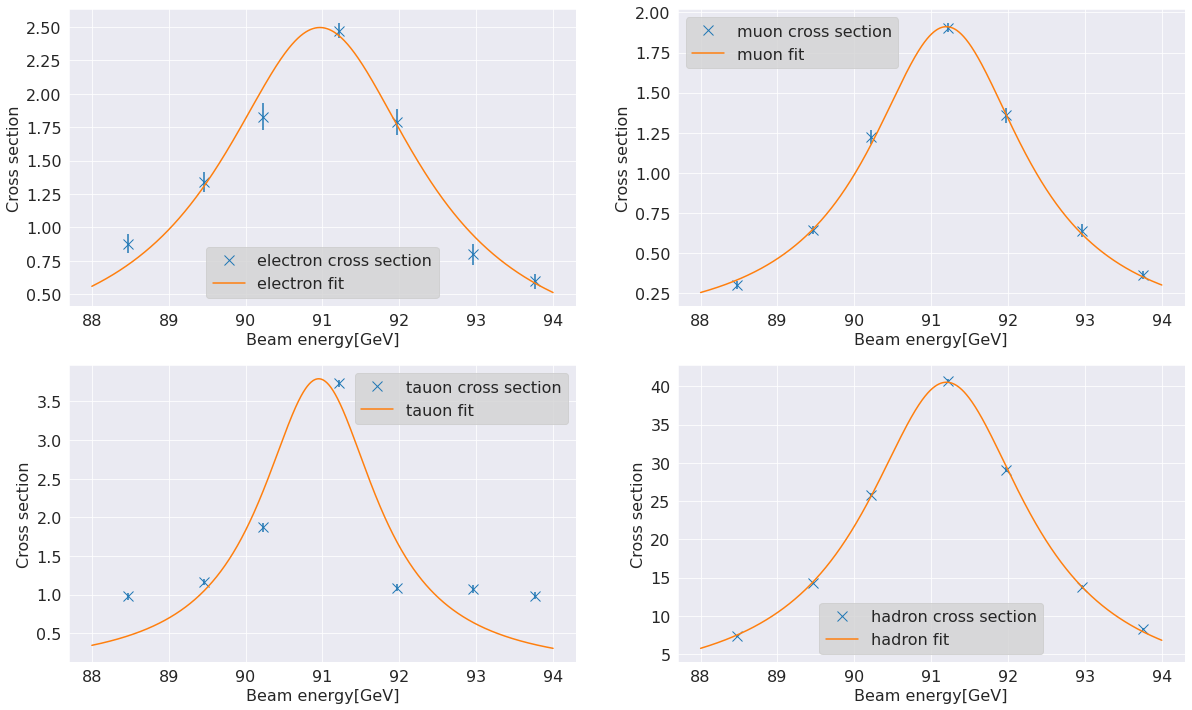

In [104]:
# Plots of the cross sections and the fits
font_size = 18

%matplotlib inline
sb.set_style("darkgrid")

energy_plot = np.linspace(88,94,1000)

fig, ax = plt.subplots(2,2)
fig.set_figheight(12)
fig.set_figwidth(20)
ax[0,0].plot(energies, cross_sections[0,:],'x',label='electron cross section',markersize = 10)
ax[0,0].errorbar(energies, cross_sections[0,:],err_cross_sections[0,:],fmt='None')
ax[0,0].plot(energy_plot,rel_breit_wigner(output_BW_e.beta,energy_plot),label= 'electron fit')
ax[0,0].tick_params(axis='x', labelsize=font_size-2)
ax[0,0].tick_params(axis='y', labelsize=font_size-2)
ax[0,0].set_xlabel('Beam energy[GeV]', fontsize=font_size-2)
ax[0,0].set_ylabel('Cross section', fontsize=font_size-2)
ax[0,0].legend(fontsize=font_size-2,frameon=True, facecolor='lightgrey')

ax[0,1].plot(energies, cross_sections[1,:],'x', label='muon cross section',markersize = 10)
ax[0,1].plot(energy_plot,rel_breit_wigner(output_BW_m.beta,energy_plot),label='muon fit')
ax[0,1].errorbar(energies, cross_sections[1,:],err_cross_sections[1,:],fmt='None')
ax[0,1].tick_params(axis='x', labelsize=font_size-2)
ax[0,1].tick_params(axis='y', labelsize=font_size-2)
ax[0,1].set_xlabel('Beam energy[GeV]', fontsize=font_size-2)
ax[0,1].set_ylabel('Cross section', fontsize=font_size-2)
ax[0,1].legend(fontsize=font_size-2,frameon=True, facecolor='lightgrey')

ax[1,0].plot(energies, cross_sections[2,:],'x', label='tauon cross section',markersize = 10)
ax[1,0].errorbar(energies, cross_sections[2,:],err_cross_sections[2,:],fmt='None')
ax[1,0].plot(energy_plot,rel_breit_wigner(output_BW_t.beta,energy_plot),label='tauon fit')
ax[1,0].tick_params(axis='x', labelsize=font_size-2)
ax[1,0].tick_params(axis='y', labelsize=font_size-2)
ax[1,0].set_xlabel('Beam energy[GeV]', fontsize=font_size-2)
ax[1,0].set_ylabel('Cross section', fontsize=font_size-2)
ax[1,0].legend(fontsize=font_size-2,frameon=True, facecolor='lightgrey')

ax[1,1].plot(energies, cross_sections[3,:],'x',label='hadron cross section',markersize = 10)
ax[1,1].errorbar(energies, cross_sections[3,:],err_cross_sections[3,:],fmt='None')
ax[1,1].plot(energy_plot,rel_breit_wigner(output_BW_h.beta,energy_plot),label='hadron fit')
ax[1,1].tick_params(axis='x', labelsize=font_size-2)
ax[1,1].tick_params(axis='y', labelsize=font_size-2)
ax[1,1].set_xlabel('Beam energy[GeV]', fontsize=font_size-2)
ax[1,1].set_ylabel('Cross section', fontsize=font_size-2)
ax[1,1].legend(fontsize=font_size-2,frameon=True, facecolor='lightgrey')

plt.savefig("Breit-Wigner_fits.PDF")

---

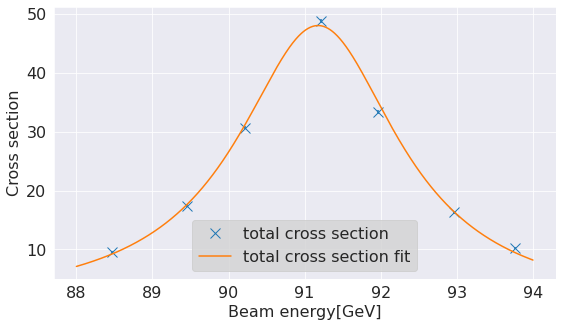

In [105]:
font_size = 18

%matplotlib inline
sb.set_style("darkgrid")

fig,ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(9)
ax.plot(energies, total_cross_section,'x',label='total cross section',markersize = 10)
ax.errorbar(energies, total_cross_section,err_total_cross_section,fmt='None')
ax.plot(energy_plot,rel_breit_wigner(output_BW_total.beta,energy_plot),label='total cross section fit')
ax.tick_params(axis='x', labelsize=font_size-2)
ax.tick_params(axis='y', labelsize=font_size-2)
ax.set_xlabel('Beam energy[GeV]', fontsize=font_size-2)
ax.set_ylabel('Cross section', fontsize=font_size-2)
ax.legend(frameon=True, facecolor='lightgrey',fontsize=font_size-2)

plt.savefig('total_cross_section_fit.PDF')

---

#5 Partial Decay widths
---
---

In [106]:
mass_Z0 = output_BW_total.beta[0]
width_Z0 = output_BW_total.beta[1]
u_mass_Z0 = 0.027
u_width_Z0 = 0.0676
conversion_factor = 2.56819e-6  # This factor is introduced to convert nanobarn, the unit of the cross section, into GeV, the unit of the mass and total decay width of the Z0 boson

max_e_cross_section = max(rel_breit_wigner(output_BW_e.beta,energy_plot))  # Gives the peak cross section of the electron channel
partial_ee = np.sqrt(max_e_cross_section*conversion_factor * mass_Z0**2 * width_Z0**2 /(12*np.pi))

Partial_ee = width_Z0*mass_Z0*np.sqrt(max_e_cross_section/(12*np.pi))

max_m_cross_section = max(rel_breit_wigner(output_BW_m.beta,energy_plot))
partial_mm = max_m_cross_section*conversion_factor* mass_Z0**2 * width_Z0**2 /(12*np.pi*partial_ee)  # From the formula, the partial decay width of the electrons has to be calculated first
max_t_cross_section = max(rel_breit_wigner(output_BW_t.beta,energy_plot))
partial_tt = max_t_cross_section* conversion_factor*mass_Z0**2 * width_Z0**2 /(12*np.pi*partial_ee)
max_q_cross_section = max(rel_breit_wigner(output_BW_h.beta,energy_plot))
partial_qq = max_q_cross_section* conversion_factor*mass_Z0**2 * width_Z0**2 /(12*np.pi*partial_ee)

def error_partial_width_e(max_e_cross_section, err_max_e_cross_section):
    partial_width = np.sqrt(max_e_cross_section*conversion_factor * mass_Z0**2 * width_Z0**2 /(12*np.pi))
    err_1 = (partial_width/width_Z0 * u_width_Z0)**2
    err_2 = (partial_width/mass_Z0 * u_mass_Z0)**2
    err_3 = (partial_width/max_e_cross_section * 0.5 *err_max_e_cross_section)**2
    err = np.sqrt(err_1 + err_2 + err_3)
    return err

def error_partial_width_rest(max_cross_section, err_max_cross_section, partial_ee, err_partial_ee):
    partial_width = max_cross_section*conversion_factor* mass_Z0**2 * width_Z0**2 /(12*np.pi*partial_ee)
    err_1 = (2 * partial_width/width_Z0 * u_width_Z0)**2
    err_2 = (2 * partial_width/mass_Z0 * u_mass_Z0)**2
    err_3 = (partial_width/max_cross_section * 0.5 *err_max_cross_section)**2
    err_4 = (partial_width/partial_ee * err_partial_ee)**2
    err = np.sqrt(err_1 + err_2 + err_3+ err_4)
    return err
# The errors of the partial decay width are calculated with the function above
error_partial_ee = error_partial_width_e(max_e_cross_section,0)
error_partial_qq = error_partial_width_rest(max_q_cross_section,0,partial_ee,error_partial_ee)
error_partial_mm = error_partial_width_rest(max_m_cross_section,0,partial_ee,error_partial_ee)
error_partial_tt = error_partial_width_rest(max_t_cross_section,0,partial_ee,error_partial_ee)

print('The peak cross section of the electron channel is',max_e_cross_section,'and the partial width of the electronic decay is calculated as',partial_ee,'+-',error_partial_ee,'. The peak cross section of the muon',max_m_cross_section,'and the partial decay width of the muon channel',partial_mm,'+-',error_partial_mm,'. The tauon peak cross section',max_t_cross_section,'and the partial decay width of the tauon decay channel',partial_tt,'+-',error_partial_tt,'. The hadronic peak cross section',max_q_cross_section,'and the partial decay width of the hadronic decay channel',partial_qq,'+-',error_partial_qq,'. All cross sections are given in units of nanobarn.')

The peak cross section of the electron channel is 2.4949677643173707 and the partial width of the electronic decay is calculated as 0.09763950523250958 +- 0.002541181970943499 . The peak cross section of the muon 1.9109207131216868 and the partial decay width of the muon channel 0.07478307160365458 +- 0.004352096302143258 . The tauon peak cross section 3.794214617679363 and the partial decay width of the tauon decay channel 0.1484849797718845 +- 0.008641272918207531 . The hadronic peak cross section 40.540696596886434 and the partial decay width of the hadronic decay channel 1.5865429662512283 +- 0.09233089292197426 . All cross sections are given in units of nanobarn.


---

---

#6 Forward Backward asymmetry and Weinberg angle calculation
---
---

In [78]:
# Forward-backward asymmetry and Weinberg angle calculation
# For monte carlo data
rad_corr_weinberg = np.array([[88.47,89.46,90.22,91.22,91.97,92.96,93.76],[0.021512,0.019262,0.016713,0.018293,0.030286,0.062196,0.093850]]) # energy, correction
# The array of the radiative corrections of the asymmetry
cos_thet_mm = branches_mm[var_cos_thet] < 1.1  # cuts all muon events with a cos_thet of smaller than 1.1
cos_thet_mask = mm[8,:] < 0    # Cuts only muon events with a cos_thet between -1 and 0

int_neg = [a == p for a,p in zip(cos_thet_mm,cos_thet_mask) if p == True]
int_pos = [a != p for a,p in zip(cos_thet_mm,cos_thet_mask) if a == True]  # The part for which the two masks have different entries collects muon events with a cos_thet between 0 and 1

asymmetry_mc = (np.sum(int_pos) - np.sum(int_neg))/(np.sum(int_neg)+np.sum(int_pos))
u_upper_mc = np.sqrt(np.sum(int_pos) + np.sum(int_neg))
u_lower_mc = np.sqrt(np.sum(int_pos) + np.sum(int_pos))
u_asymmetry_mc = np.sqrt((u_upper_mc/(np.sum(int_neg)+np.sum(int_pos)))**2+(u_lower_mc*asymmetry_mc/(np.sum(int_neg)+np.sum(int_neg)))**2)
sin_weinberg_mc = -0.25*np.sqrt(asymmetry_mc/3) + 0.25
u_weinberg_mc = np.sqrt((u_asymmetry_mc*0.25*0.5*np.sqrt(1/(asymmetry_mc*3)))**2)
print('This is the calculated sine of the weinberg angle from the monte carlo data',sin_weinberg_mc,'+-',u_weinberg_mc)

# For data
cut_P_char_high = 69
cut_P_char_low = 2
cut_E_ecal = 16

mask_data_P_char_high = branches_data[var_P_char] > cut_P_char_high  # The cuts to select the muon events
mask_data_P_char_low = branches_data[var_P_char] < cut_P_char_low
mask_data_E_ecal = branches_data[var_E_ecal] < cut_E_ecal

sin_weinberg_data = np.empty(7)
asymmetry_data = np.empty(7)
u_asymmetry_data=np.empty(7)
# To apply the radiative corrections properly, the asymmetry terms are calculated for each energy individually.

for i in range(7):
    int_d_mm_high_neg =[a == p == n == f  for a,p,n,f in zip(mask_data_E_ecal,mask_data_P_char_high,mask_energy[i,:],cos_thet_mask) if n==True]
    int_d_mm_low_neg =[a == p == n ==f for a,p,n,f in zip(mask_data_E_ecal,mask_data_P_char_low,mask_energy[i,:],cos_thet_mask) if n==True]
    int_d_mm_high_both =[a == p == n == f  for a,p,n,f in zip(mask_data_E_ecal,mask_data_P_char_high,mask_energy[i,:],cos_thet_mm) if n==True]
    int_d_mm_low_both =[a == p == n ==f for a,p,n,f in zip(mask_data_E_ecal,mask_data_P_char_low,mask_energy[i,:],cos_thet_mm) if n==True]
    upper_term = np.sum(int_d_mm_high_both) + np.sum(int_d_mm_low_both) - 2*np.sum(int_d_mm_high_neg) - 2*np.sum(int_d_mm_low_neg)
    lower_term = np.sum(int_d_mm_high_both) + np.sum(int_d_mm_low_both)
    u_upper_term =np.sqrt(np.sum(int_d_mm_high_both) + np.sum(int_d_mm_low_both) +2*np.sum(int_d_mm_high_neg) +2*np.sum(int_d_mm_low_neg))
    u_lower_term = np.sqrt(np.sum(int_d_mm_high_both) + np.sum(int_d_mm_low_both))
    u_asymmetry_data[i] = np.sqrt((u_upper_term/lower_term)**2+(u_lower_term*upper_term/lower_term**2)**2)
    asymmetry_data[i] = upper_term/lower_term + rad_corr_weinberg[1,i]

# In the next step, the total asymmetry is calculated as a weighted mean of the individual asymmetry terms, using the number of events as weighting factors

contribution_total_asymmetry = np.empty(7)
u_contribution_total_asymmetry = np.empty(7)
for i in range(7):
    contribution_total_asymmetry[i] = asymmetry_data[i]*np.sum(mask_energy[i])
    u_contribution_total_asymmetry[i] = np.sqrt((u_asymmetry_data[i]*np.sqrt(np.sum(mask_energy[i])))**2 + (asymmetry_data[i]*np.sum(mask_energy[i]))**2)

Total_asymmetry=np.sum(contribution_total_asymmetry)/np.sum(mask_energy)
u_Total_asymmetry = np.sqrt(np.sum(mask_energy)**(-2)*(np.sum(u_contribution_total_asymmetry[i]**2)) + np.sum(mask_energy)**(-3)*np.sum(contribution_total_asymmetry)**2)

sin_square_weinberg = -0.25*np.sqrt(Total_asymmetry/3) + 0.25
u_sin_square_weinberg = 0.25/2*(Total_asymmetry*3)**(-1/2)*u_Total_asymmetry

print('This is the calculated sine squared of the weinberg angle from the data with the weighted contributions of the energies',sin_square_weinberg,'+-',u_sin_square_weinberg)


This is the calculated sine of the weinberg angle from the monte carlo data 0.24030800648376746 +- 0.003586132640006784


This is the calculated sine squared of the weinberg angle from the data with the weighted contributions of the energies 0.23437602957130246 +- 0.0008244823458442817


---

---

#7 Number of neutrino generations
---
---

In [79]:
# Something went wrong in the calculation of our partial decay widths. Thus, the code will use the literature values for these decay widths from here on. The total decay width however will be used as it was calculated above. To carry out the uncertainty propagation, the literature values are considered to have relative uncertainties of 1% each, although the values might be more reliable.

partial_ee_theo = partial_mm_theo = partial_tt_theo = 0.0838
partial_qq_theo = 2*0.299+3*0.378

u_partial_ee_theo = u_partial_mm_theo = u_partial_tt_theo = 0.01*partial_ee_theo
u_partial_qq_theo = 0.01*partial_qq_theo

In [111]:
# Theoretical partial decay width for neutrinos

Q = 0 # Charge in units of e
I_3 = 1/2 # Third component of weak isospin
N_c = 1 # color factor, 1 for leptons, 3 for quarks
G_F = 1.1663*10**(-5) # Fermi's constant, in GeV^(-2) - check for units: Are all energies in GeV?
M_z = mass_Z0 # Mass of Z boson, in GeV (literature value, we can later take our own)
g_v = I_3 - Q*sin_square_weinberg # Fermion vector coupling
g_a = I_3 # Fermion axial coupling

Gamma_nu = N_c*np.sqrt(2)/(12*np.pi)*G_F*M_z**3*(g_v**2 + g_a**2)  # With this formula, we calculated the partial decay width of one neutrino decay
u_Gamma_nu = np.sqrt((N_c*np.sqrt(2)/(12*np.pi)*G_F*M_z**3*2*g_v*Q*u_sin_square_weinberg)**2 + (N_c*np.sqrt(2)/(12*np.pi)*G_F*3*M_z**2*u_mass_Z0*(g_v**2 + g_a**2))**2)

partial_nn = width_Z0 - partial_ee - partial_mm - partial_tt - partial_qq # By subtracting all contributions from the total decay width, we get as a result the decay width of all neutrino generations combined.
u_partial_nn = np.sqrt(u_width_Z0**2 + error_partial_ee**2 + error_partial_mm**2 + error_partial_tt**2 + error_partial_qq**2)

N_gen_nn = partial_nn/Gamma_nu  # By dividing this decay width by the partial decay width of one neutrino generation, we get the number of neutrino generations.
u_N_gen_nn = np.sqrt((u_partial_nn/Gamma_nu)**2 + (partial_nn*u_Gamma_nu/(Gamma_nu**2))**2)

print(partial_nn,u_partial_nn) # Uncertainty seems quite high...
print('The partial decay width of one neutrino generation is',Gamma_nu,"+-",u_Gamma_nu,'. With this in mind the number of calculated neutrino generations is',N_gen_nn, "+-",u_N_gen_nn)
print(partial_nn,u_partial_nn)

0.6901036574302577 0.11486872391320711
The partial decay width of one neutrino generation is 0.16580803347811537 +- 0.000147302499953729 . With this in mind the number of calculated neutrino generations is 4.162064062603715 +- 0.6927912814435415
0.6901036574302577 0.11486872391320711


#8 Branching ratios
---
---

In [110]:
# Branching ratios
# The branching ratios are given by the quotient of the partial decay width and the total decay width

def error_branching_ratio(partial, err_partial):
    err_1 = (err_partial/width_Z0)**2
    err_2 = (u_width_Z0 * partial/(width_Z0)**2)**2
    return np.sqrt(err_1 + err_2)

branching_ratio_qq = partial_qq/width_Z0
err_br_qq = error_branching_ratio(partial_qq,error_partial_qq)
branching_ratio_ee = partial_ee/width_Z0
err_br_ee = error_branching_ratio(partial_ee,error_partial_ee)
branching_ratio_mm = partial_mm/width_Z0
err_br_mm = error_branching_ratio(partial_mm,error_partial_mm)
branching_ratio_tt = partial_tt/width_Z0
err_br_tt = error_branching_ratio(partial_tt,error_partial_tt)
branching_ratio_nn = partial_nn/width_Z0
err_br_nn =error_branching_ratio(partial_nn,u_partial_nn)

print('The branching ratios are for the electrons',branching_ratio_ee,'for the muon',branching_ratio_mm,'for the tauons',branching_ratio_tt,'for the hadrons',branching_ratio_qq,'and for all neutrino generations',branching_ratio_nn,'+-',err_br_nn)
print(err_br_ee,err_br_mm,err_br_tt,err_br_qq)

The branching ratios are for the electrons 0.0375890158416739 for the muon 0.028789802411481918 for the tauons 0.057163381190891545 for the hadrons 0.610783397047135 and for all neutrino generations 0.2656744035088176 +- 0.04475911546962818
0.0013834774719309034 0.001835353901639077 0.003644173488934489 0.03893752637842874


---
### The End